In [1]:
# Customer Retention Project -

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from  sklearn.preprocessing import LabelEncoder
import plotly.express as px


#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Downloading the dataset-

data = pd.read_excel('C:/Users/naveen.saxena/Downloads/customer.xlsx','datasheet')
encoded_data = pd.read_excel('C:/Users/naveen.saxena/Downloads/customer.xlsx','codedsheet')

In [4]:
# getting the first 5 rows of dataset
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [5]:
encoded_data.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [6]:
# Checking the shape of dataset to get to know about the no of rows and columns

print('Original Data :', data.shape)
print('Encoded Data :', encoded_data.shape)

Original Data : (269, 71)
Encoded Data : (269, 71)


In [7]:
# Getting the columns name-

data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
# Rename columns name for making it more accessible and better visualization

In [9]:
# Rename the new column names to the original datastes

columns = ['gender','age','city','pinCode','shoppingSince','shoppingFrequency','internetAccessibility','deviceUsed',
           'screenSize','OS', 'browserUsed','channelFirstUsed','loginMode','timeSpentDeciding','paymentMode','cancellingFrequency',
          'cancellationReason','contentReadability','similarProductInfo','sellerProductInfo','productInfoClarity','navigationEase',
          'loadingProcessingSpeed','userFrienlyInterface','conveninetPaymentMode','timelyFulfilmentTrust','custSupportResponse',
          'custPrivacyGuarantee','variousChannelResponses','benefit','enjoy','convenience','returnReplacementPolicy','loyaltyProgramsAccess',
          'infoSatisfaction','siteQualitySatisfaction','netBenefitSatisfaction','trust','productSeveralCategory','relevantProductInfo','monetarySavings',
          'patronizingConvenience','adventureSense','socialStatus','gratification','roleFulfilment','moneyWorthy','shoppedFrom','easyWebApp',
           'visuallyAppealingWebApp','productVariety','completeProductInfo','fastWebApp','reliableWebApp','quickPurchase','paymentOptionsAvailability',
           'fastDelivery','custInfoPrivacy','finInfoSecurity','perceivedTrustworthiness','multiChannelAssistance','longLoginTime','longDisplayTime',
           'latePriceDeclare','longLoadingTime','limitedPaymentMode','lateDelivery','webAppDesignChange','pageDisruption','webAppEfficiency',
           'recommendation']

data.columns = columns
encoded_data.columns = columns

In [10]:
# Getting for first 5 rows of renamed dataset
data.head()

gender          age           city  pinCode  shoppingSince  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

    shoppingFrequency internetAccessibility  deviceUsed  screenSize  \
0         31-40 times               Dial-up     Desktop      Others   
1  41 times and above                 Wi-Fi  Smartphone  4.7 inches   
2  41 times and above       Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times       Mobile Internet  Smartphone  5.5 inches   
4         11-20 times                 Wi-Fi  Smartphone  4.7 inches   

                      OS  ...            longLoginTime  \
0  Window/windows Mobile  ...                Amazon.in   
1                IOS/Mac  ...  Amazon.in, Flipkart.com   
2                Android  ...               Myntra.com   
3                IOS/Mac  ...             Snapdeal.com   
4                IOS/Mac  ...  Flipkart.com, Paytm.com   

            longDisplayTime latePriceDeclare longLoadingTime  \
0                 Amazon.in     Flipkart.com    Flipkart.com   
1                Myntra.com     snapdeal.com    Snapdeal.com   
2                Myntra.com       Myntra.com      Myntra.com   
3  Myntra.com, Snapdeal.com       Myntra.com       Paytm.com   
4                 Paytm.com        Paytm.com       Paytm.com   

  limitedPaymentMode  lateDelivery       webAppDesignChange  \
0          Amazon.in     Paytm.com             Flipkart.com   
1       Snapdeal.com  Snapdeal.com                Amazon.in   
2          Amazon.in     Paytm.com                Paytm.com   
3          Paytm.com     Paytm.com  Amazon.in, Flipkart.com   
4       Snapdeal.com     Paytm.com                Amazon.in   

            pageDisruption                    webAppEfficiency  \
0                Amazon.in                           Amazon.in   
1               Myntra.com             Amazon.in, Flipkart.com   
2                Paytm.com                           Amazon.in   
3  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com, Paytm.com   
4             Snapdeal.com                           Paytm.com   

                     recommendation  
0                      Flipkart.com  
1             Amazon.in, Myntra.com  
2  Amazon.in, Paytm.com, Myntra.com  
3           Amazon.in, Flipkart.com  
4             Amazon.in, Myntra.com  

[5 rows x 71 columns]

In [11]:
# Replace the same values

data.replace('indifferent (3)','Indifferent (3)',inplace=True)
data.replace('indifferent  (3)','Indifferent (3)',inplace=True)
data.replace('Dis-agree (2)','Disagree (2)',inplace=True)

In [12]:
# Checking the general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    object
 1   age                         269 non-null    object
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    object
 5   shoppingFrequency           269 non-null    object
 6   internetAccessibility       269 non-null    object
 7   deviceUsed                  269 non-null    object
 8   screenSize                  269 non-null    object
 9   OS                          269 non-null    object
 10  browserUsed                 269 non-null    object
 11  channelFirstUsed            269 non-null    object
 12  loginMode                   269 non-null    object
 13  timeSpentDeciding           269 non-null    object

In [13]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    int64 
 1   age                         269 non-null    int64 
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    int64 
 5   shoppingFrequency           269 non-null    int64 
 6   internetAccessibility       269 non-null    int64 
 7   deviceUsed                  269 non-null    int64 
 8   screenSize                  269 non-null    int64 
 9   OS                          269 non-null    int64 
 10  browserUsed                 269 non-null    int64 
 11  channelFirstUsed            269 non-null    int64 
 12  loginMode                   269 non-null    int64 
 13  timeSpentDeciding           269 non-null    int64 

In [14]:
# Checking the type of dataset-

data.columns.groupby(data.dtypes)

{int64: ['pinCode'], object: ['gender', 'age', 'city', 'shoppingSince', 'shoppingFrequency', 'internetAccessibility', 'deviceUsed', 'screenSize', 'OS', 'browserUsed', 'channelFirstUsed', 'loginMode', 'timeSpentDeciding', 'paymentMode', 'cancellingFrequency', 'cancellationReason', 'contentReadability', 'similarProductInfo', 'sellerProductInfo', 'productInfoClarity', 'navigationEase', 'loadingProcessingSpeed', 'userFrienlyInterface', 'conveninetPaymentMode', 'timelyFulfilmentTrust', 'custSupportResponse', 'custPrivacyGuarantee', 'variousChannelResponses', 'benefit', 'enjoy', 'convenience', 'returnReplacementPolicy', 'loyaltyProgramsAccess', 'infoSatisfaction', 'siteQualitySatisfaction', 'netBenefitSatisfaction', 'trust', 'productSeveralCategory', 'relevantProductInfo', 'monetarySavings', 'patronizingConvenience', 'adventureSense', 'socialStatus', 'gratification', 'roleFulfilment', 'moneyWorthy', 'shoppedFrom', 'easyWebApp', 'visuallyAppealingWebApp', 'productVariety', 'completeProductInf

In [15]:
# Checking the null values of dataset

data.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

In [16]:
# this clearly shows we do not have any null values in our dataset

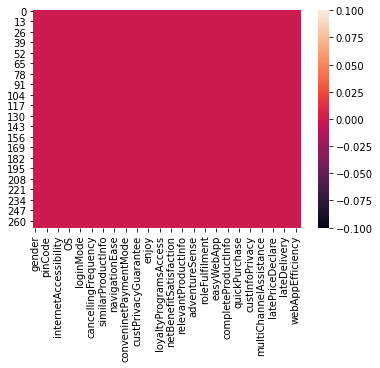

In [17]:
# We can visualize the null values by plotting the heatmap

sns.heatmap(data.isnull());

In [18]:
# Checking the type of variables i.e ocategorical and continuos in our dataset

categorical=[x for x in data.columns if data[x].dtype==object]
print(len(categorical))
continous=[x for x in data.columns if x not in categorical]
print(len(continous))

70
1


In [19]:
# this clearly shows that we have only one continous i.e numerical data rest all are categorical data

In [20]:
# Checking the statistical summary

data.describe()

pinCode
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

In [21]:
# Let's describe the object types

data.describe(include='object')

gender          age   city  shoppingSince   shoppingFrequency  \
count      269          269    269            269                 269   
unique       2            5     11              5                   6   
top     Female  31-40 years  Delhi  Above 4 years  Less than 10 times   
freq       181           81     58             98                 114   

       internetAccessibility  deviceUsed screenSize                     OS  \
count                    269         269        269                    269   
unique                     4           4          4                      3   
top          Mobile internet  Smartphone     Others  Window/windows Mobile   
freq                     142         141        134                    122   

          browserUsed  ... longLoginTime          longDisplayTime  \
count             269  ...           269                      269   
unique              4  ...            10                       10   
top     Google chrome  ...     Amazon.in  Amazon.in, Flipkart.com   
freq              216  ...            57                       60   

       latePriceDeclare longLoadingTime limitedPaymentMode lateDelivery  \
count               269             269                269          269   
unique                8              11                  8            6   
top          Myntra.com      Myntra.com       Snapdeal.com    Paytm.com   
freq                 75              61                 87           72   

       webAppDesignChange pageDisruption webAppEfficiency recommendation  
count                 269            269              269            269  
unique                  7              8                8              8  
top             Amazon.in      Amazon.in        Amazon.in      Amazon.in  
freq                   96             53               94             79  

[4 rows x 70 columns]

Female    67.0
Male      33.0
Name: gender, dtype: float64 2


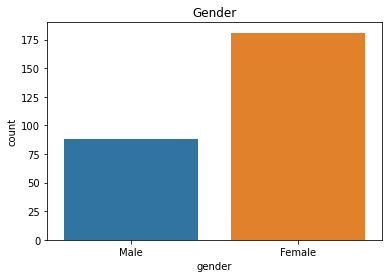

In [22]:
sns.countplot(data['gender'])
plt.title('Gender')
print(round(data['gender'].value_counts()/269*100),2)

In [23]:
# Let's check which city people shop the most

city_count = pd.DataFrame(data['city'].value_counts()).reset_index()
city_count.columns = ['city','count']


fig = px.bar(city_count, x='city',y='count',
           color='city',
           title = 'Online Shopping is preferred in which cities?')
fig.show(height=200,width=200)

In [24]:
# it clearly states the Delhi is on the highest position in online shopping followed by greater noida , noida and bangalore.

In [25]:
# Now we will ckeck how gender affects online shopping
dataset = data[['age','city','gender']]

fig = px.histogram(dataset,x='city',color='gender',title='Online shopping in cities based on Gender:')
fig.show()

In [26]:
# graph indicates that Delhi has high number of male online shoppers and moradabad and bulandshahr has only men shppers.
# whereas karnal , gurgaon , greater noida , ghaziabad and bangalore has more female percentahe in respect of online shopping.
# Solan amd meerut has onluy female shoppers.

In [27]:
def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data,orient='v')
    plt.show()
    #checking percentage of data classification in each string attribute
    print(round(data[i].value_counts()/269*100),2)

In [28]:
# now we will interpret how much online shopping depend on age factor-

In [29]:
fig = px.histogram(dataset,x='city',color='age',title='Online shopping in cities based on various age groups : ')
fig.show()

In [30]:
# Graph indicates that in delhi age between 41-50 shopped more online
# moradabad and bulandshar shows that only 31-40 aged people shopped online
# in gurgaon highest perecentage achieved by senior citizens
#in bangalore 21-30 year people enjoyed most of the online shopping


In [31]:
# Now we fill find the average of shopping frequency of last one year

fig = px.histogram(data,x='shoppingFrequency',color='shoppingSince',
                   color_discrete_map={'Above 4 years':'#40E0D0','3-4 years':'#DE3163','2-3 years':'#FF7F50',
                                       'Less than 1 year':'#FFBF00','1-2 years':'#DFFF00'})
fig.update_layout(title='Shopping frequency of people in past one year : ', title_x=0.5)
            
fig.show()


In [32]:
# Now we will check the cancellation reason relate to online shopping

reasons = pd.DataFrame(data['cancellationReason'].value_counts()).reset_index()
reasons.columns = ['Reason','Count']

fig = go.Figure(go.Funnelarea(
    text = reasons['Reason'],
    values = reasons['Count'],
    marker = {"colors": ["dark blue", "red", "green", "yellow", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat"], "width": [0, 1, 5, 0, 4]}}
    ))

fig.update_layout(title = 'Reasons for not purchasing any product :',title_x=0.5)
fig.show()

In [33]:
# Graph indicates that mostly people cancel their orders as they got better alternative offer.
# next to that second higher reason of cancellation is non applicability of promo code.
# next reason is of price changes .
# some people dont trust on online shopping
# very less people now also dont prefer doing online payment they want cah on delivery mode which is sometimes not available.

In [34]:
fig = px.histogram(data,x='cancellingFrequency',color='cancellationReason',
                   color_discrete_map={'Lack of trust':'#FF5722','Promo code not applicable':'#4DD0E1',
                                       'Better alternative offer':'#CDDC39','Change in price':'#FFEE58',
                                       'No preferred mode of payment':'#004D40'})
fig.update_layout(title='Why and how often do people abandon their carts? ', title_x=0.4)
            
fig.show()

In [35]:
fig = px.histogram(data,x='cancellationReason',color='paymentMode')
fig.update_layout(title='Payment Mode vs Cancellation Reasons : ', title_x=0.5)
            
fig.show()

In [36]:
# Grah indicates when the preferred payment mode of people who cancel their cart was analysed, it appears that they preferred CoD
# which shows that the customer may have some difficulty in trusting the retail store som they dont prefer doing online payment.
# Lack of trust is also a reason for cancelling their product.
# e-wallet payment mode is also not reliable

In [37]:
def value_count(column):
    diff_count=len(data[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=data,orient='v')
    plt.show()
    
# Let's check the percentage of data classification in each string attribute
    print(round(data[i].value_counts()/269*100),2)

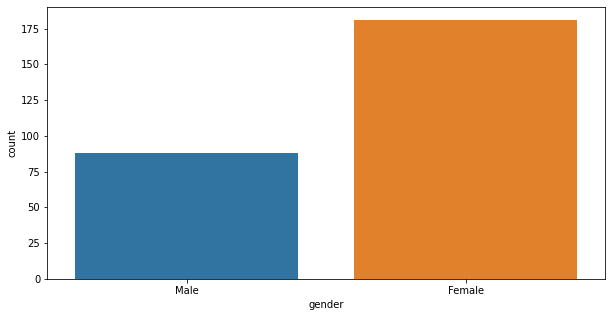

Female    67.0
Male      33.0
Name: gender, dtype: float64 2


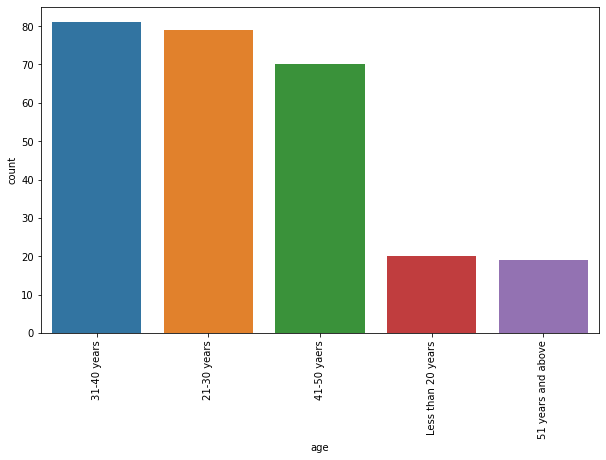

31-40 years           30.0
21-30 years           29.0
41-50 yaers           26.0
Less than 20 years     7.0
51 years and above     7.0
Name: age, dtype: float64 2


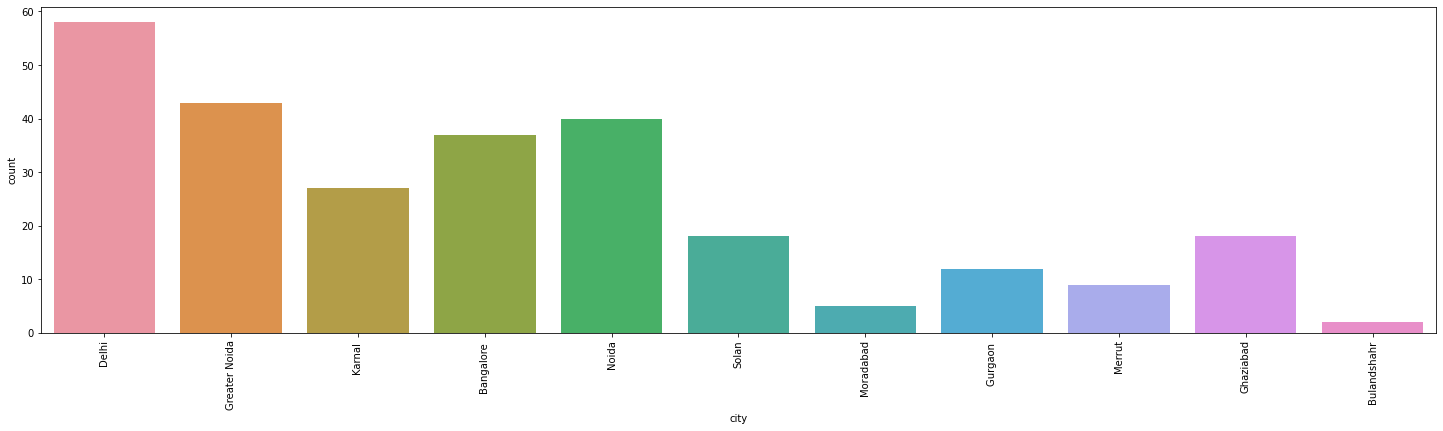

Delhi            22.0
Greater Noida    16.0
Noida            15.0
Bangalore        14.0
Karnal           10.0
Ghaziabad         7.0
Solan             7.0
Gurgaon           4.0
Merrut            3.0
Moradabad         2.0
Bulandshahr       1.0
Name: city, dtype: float64 2


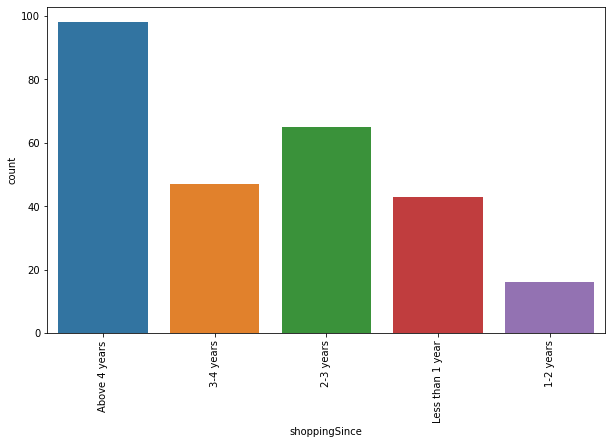

Above 4 years       36.0
2-3 years           24.0
3-4 years           17.0
Less than 1 year    16.0
1-2 years            6.0
Name: shoppingSince, dtype: float64 2


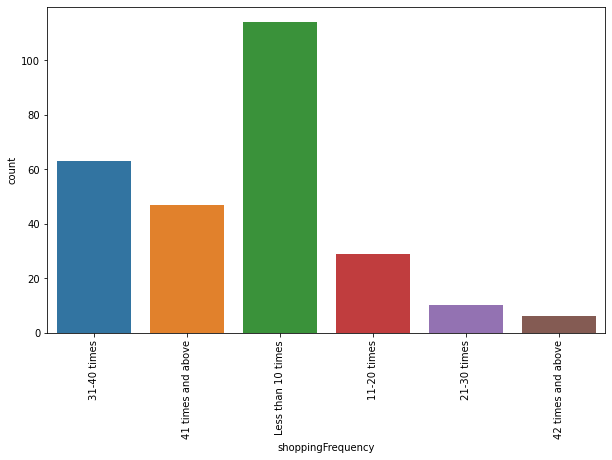

Less than 10 times    42.0
31-40 times           23.0
41 times and above    17.0
11-20 times           11.0
21-30 times            4.0
42 times and above     2.0
Name: shoppingFrequency, dtype: float64 2


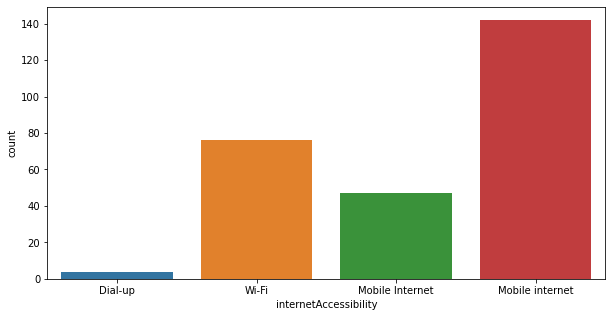

Mobile internet    53.0
Wi-Fi              28.0
Mobile Internet    17.0
Dial-up             1.0
Name: internetAccessibility, dtype: float64 2


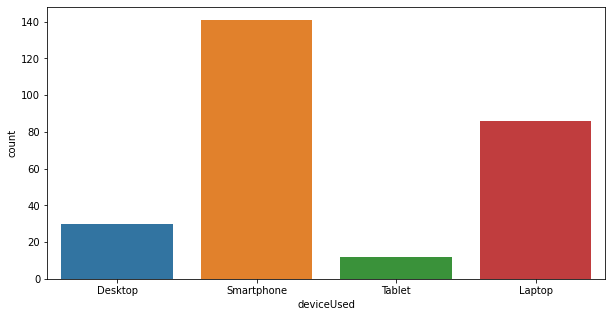

Smartphone    52.0
Laptop        32.0
Desktop       11.0
Tablet         4.0
Name: deviceUsed, dtype: float64 2


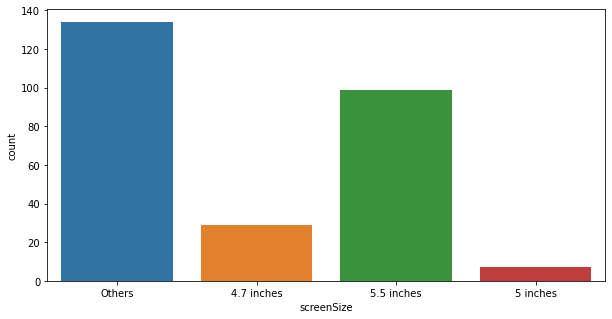

Others        50.0
5.5 inches    37.0
4.7 inches    11.0
5 inches       3.0
Name: screenSize, dtype: float64 2


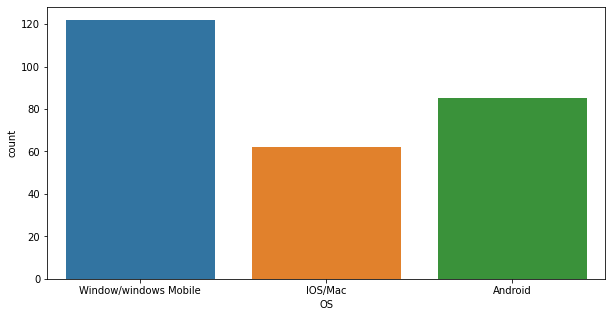

Window/windows Mobile    45.0
Android                  32.0
IOS/Mac                  23.0
Name: OS, dtype: float64 2


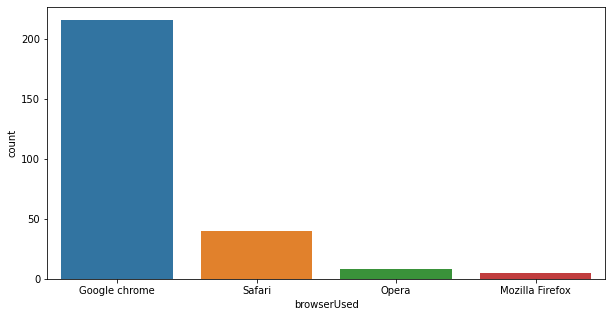

Google chrome      80.0
Safari             15.0
Opera               3.0
Mozilla Firefox     2.0
Name: browserUsed, dtype: float64 2


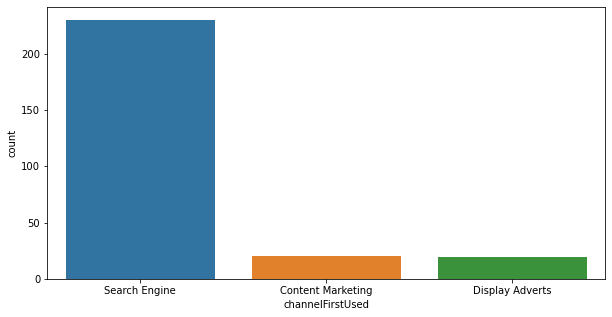

Search Engine        86.0
Content Marketing     7.0
Display Adverts       7.0
Name: channelFirstUsed, dtype: float64 2


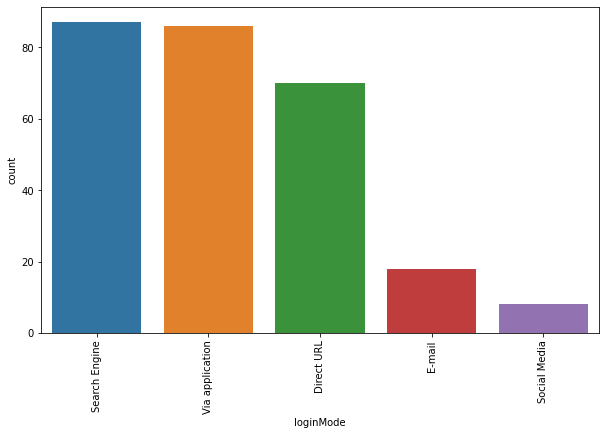

Search Engine      32.0
Via application    32.0
Direct URL         26.0
E-mail              7.0
Social Media        3.0
Name: loginMode, dtype: float64 2


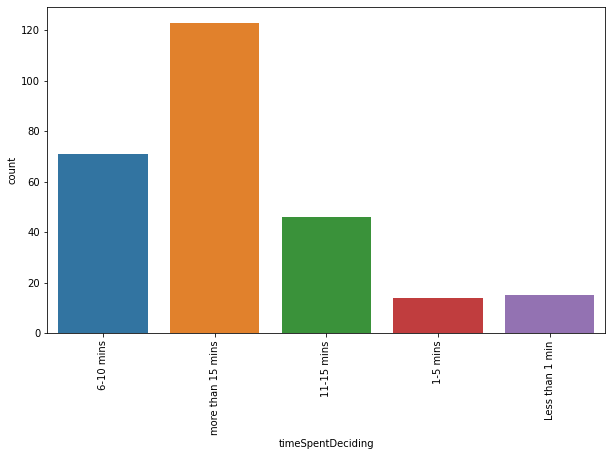

more than 15 mins    46.0
6-10 mins            26.0
11-15 mins           17.0
Less than 1 min       6.0
1-5 mins              5.0
Name: timeSpentDeciding, dtype: float64 2


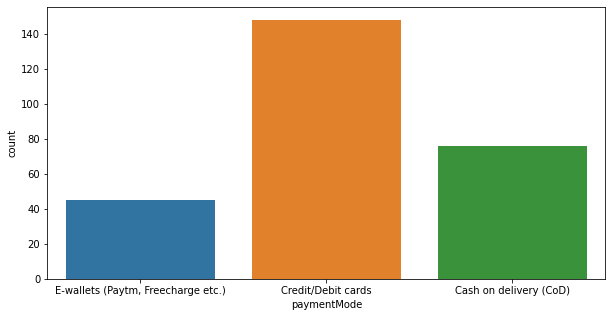

Credit/Debit cards                    55.0
Cash on delivery (CoD)                28.0
E-wallets (Paytm, Freecharge etc.)    17.0
Name: paymentMode, dtype: float64 2


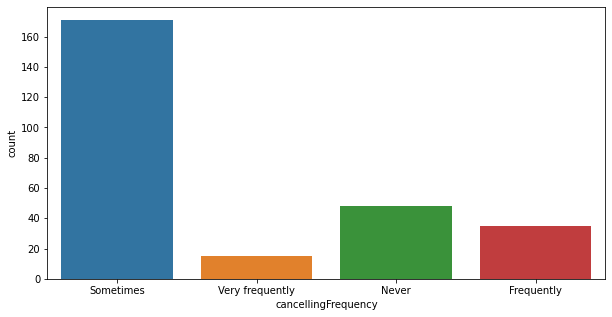

Sometimes          64.0
Never              18.0
Frequently         13.0
Very frequently     6.0
Name: cancellingFrequency, dtype: float64 2


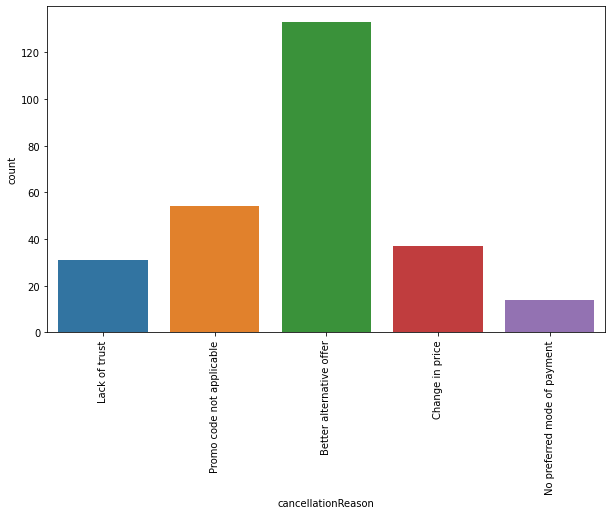

Better alternative offer        49.0
Promo code not applicable       20.0
Change in price                 14.0
Lack of trust                   12.0
No preferred mode of payment     5.0
Name: cancellationReason, dtype: float64 2


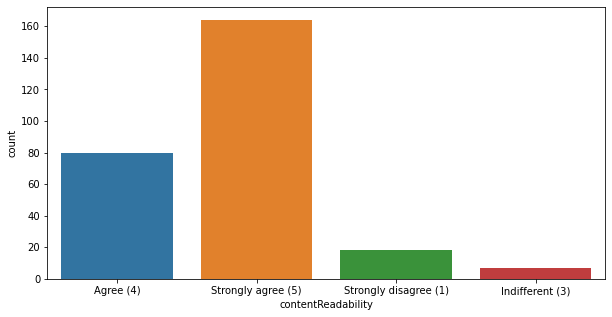

Strongly agree (5)       61.0
Agree (4)                30.0
Strongly disagree (1)     7.0
Indifferent (3)           3.0
Name: contentReadability, dtype: float64 2


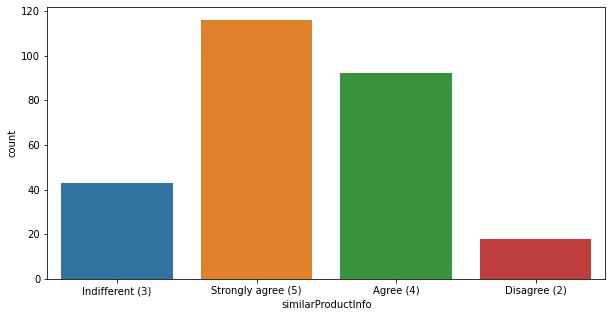

Strongly agree (5)    43.0
Agree (4)             34.0
Indifferent (3)       16.0
Disagree (2)           7.0
Name: similarProductInfo, dtype: float64 2


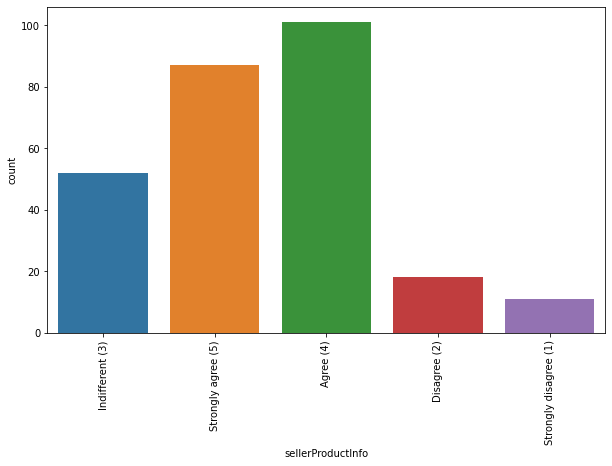

Agree (4)                38.0
Strongly agree (5)       32.0
Indifferent (3)          19.0
Disagree (2)              7.0
Strongly disagree (1)     4.0
Name: sellerProductInfo, dtype: float64 2


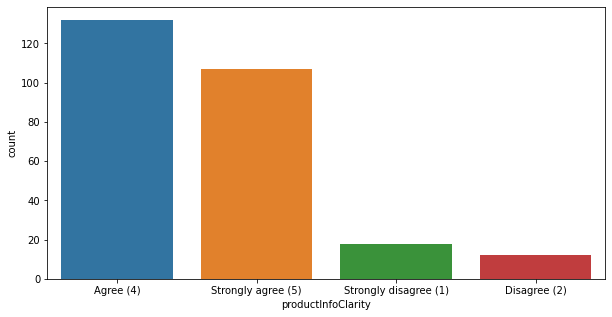

Agree (4)                49.0
Strongly agree (5)       40.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Name: productInfoClarity, dtype: float64 2


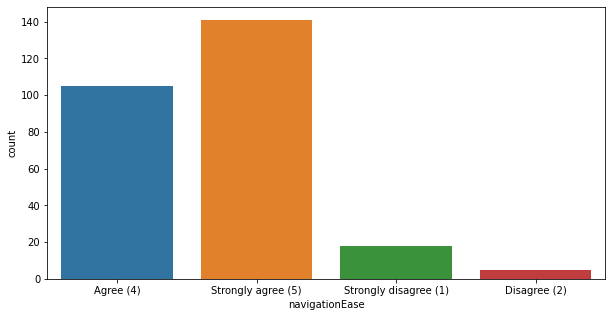

Strongly agree (5)       52.0
Agree (4)                39.0
Strongly disagree (1)     7.0
Disagree (2)              2.0
Name: navigationEase, dtype: float64 2


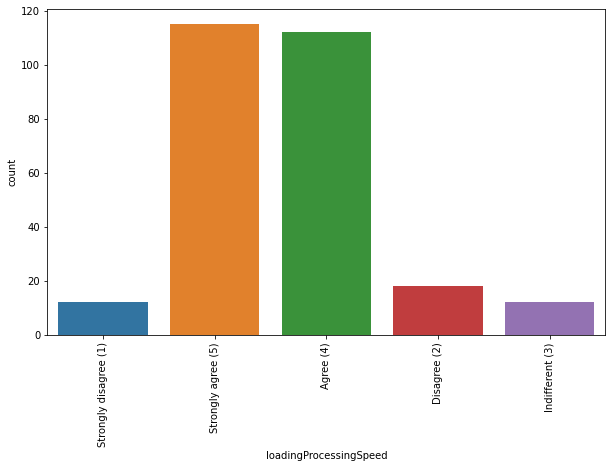

Strongly agree (5)       43.0
Agree (4)                42.0
Disagree (2)              7.0
Strongly disagree (1)     4.0
Indifferent (3)           4.0
Name: loadingProcessingSpeed, dtype: float64 2


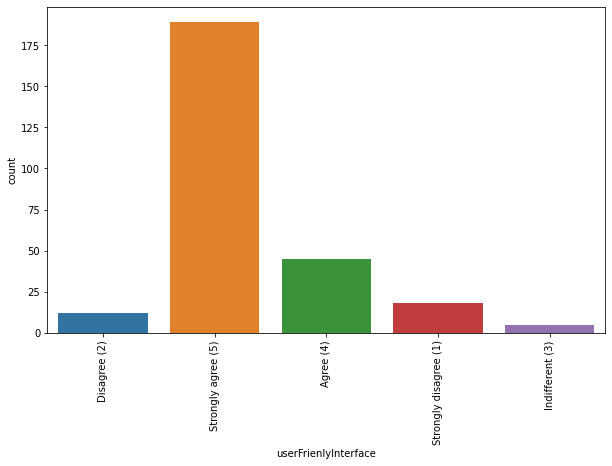

Strongly agree (5)       70.0
Agree (4)                17.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Indifferent (3)           2.0
Name: userFrienlyInterface, dtype: float64 2


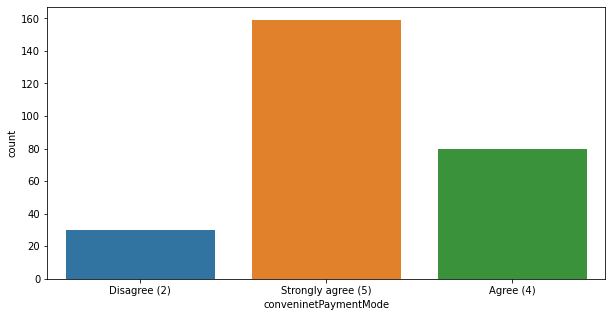

Strongly agree (5)    59.0
Agree (4)             30.0
Disagree (2)          11.0
Name: conveninetPaymentMode, dtype: float64 2


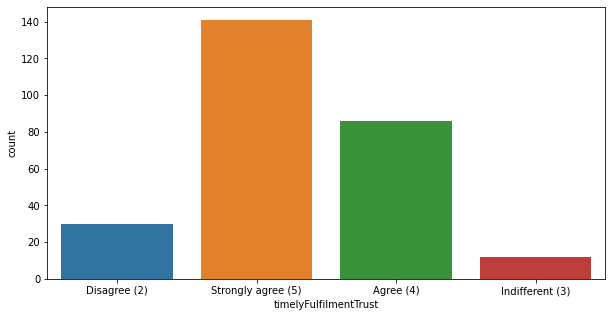

Strongly agree (5)    52.0
Agree (4)             32.0
Disagree (2)          11.0
Indifferent (3)        4.0
Name: timelyFulfilmentTrust, dtype: float64 2


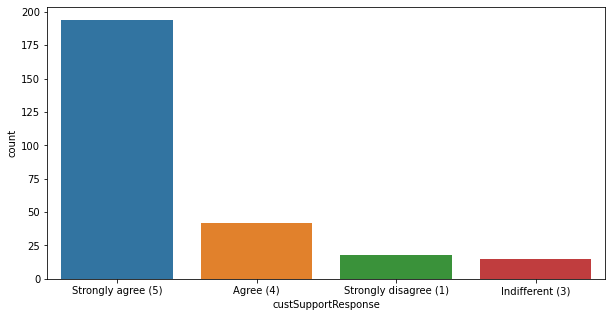

Strongly agree (5)       72.0
Agree (4)                16.0
Strongly disagree (1)     7.0
Indifferent (3)           6.0
Name: custSupportResponse, dtype: float64 2


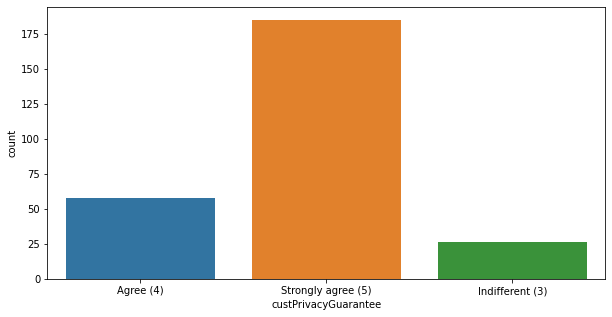

Strongly agree (5)    69.0
Agree (4)             22.0
Indifferent (3)       10.0
Name: custPrivacyGuarantee, dtype: float64 2


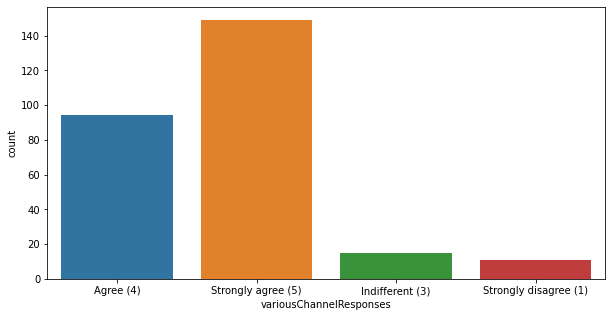

Strongly agree (5)       55.0
Agree (4)                35.0
Indifferent (3)           6.0
Strongly disagree (1)     4.0
Name: variousChannelResponses, dtype: float64 2


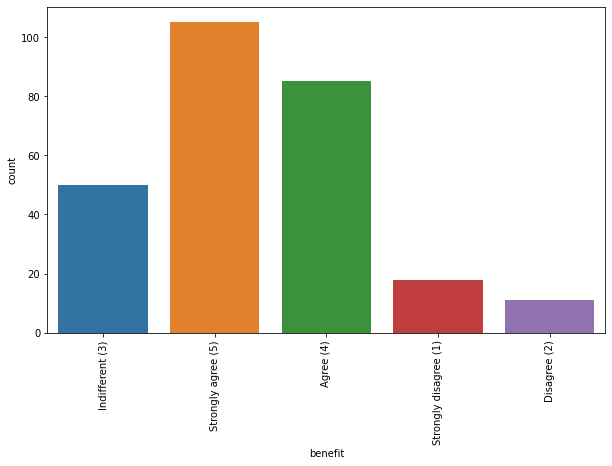

Strongly agree (5)       39.0
Agree (4)                32.0
Indifferent (3)          19.0
Strongly disagree (1)     7.0
Disagree (2)              4.0
Name: benefit, dtype: float64 2


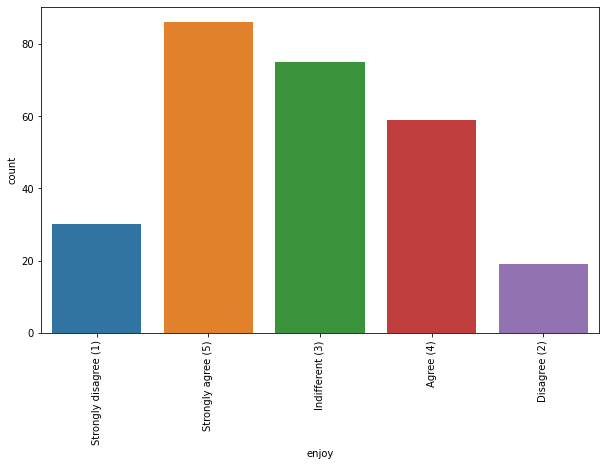

Strongly agree (5)       32.0
Indifferent (3)          28.0
Agree (4)                22.0
Strongly disagree (1)    11.0
Disagree (2)              7.0
Name: enjoy, dtype: float64 2


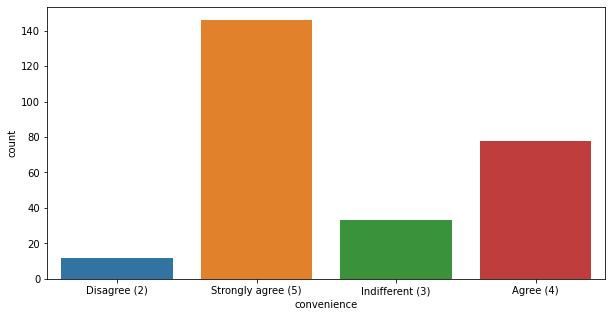

Strongly agree (5)    54.0
Agree (4)             29.0
Indifferent (3)       12.0
Disagree (2)           4.0
Name: convenience, dtype: float64 2


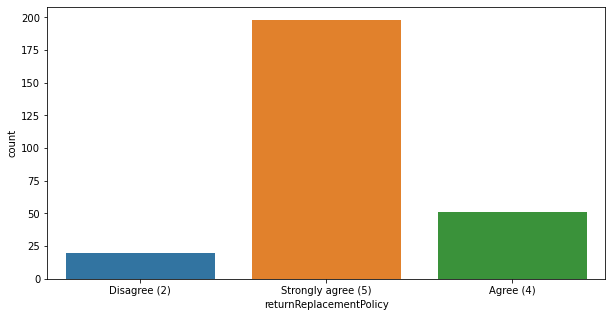

Strongly agree (5)    74.0
Agree (4)             19.0
Disagree (2)           7.0
Name: returnReplacementPolicy, dtype: float64 2


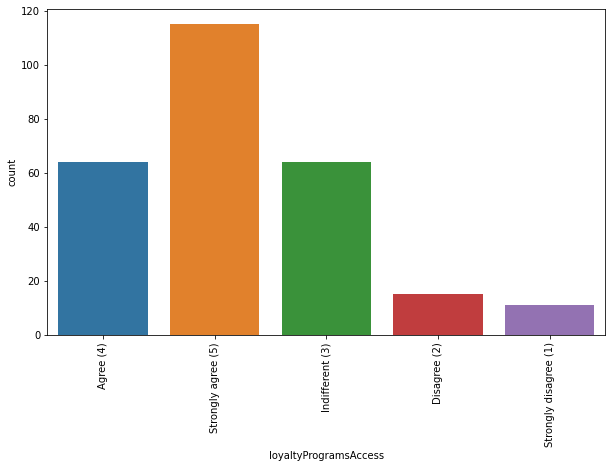

Strongly agree (5)       43.0
Agree (4)                24.0
Indifferent (3)          24.0
Disagree (2)              6.0
Strongly disagree (1)     4.0
Name: loyaltyProgramsAccess, dtype: float64 2


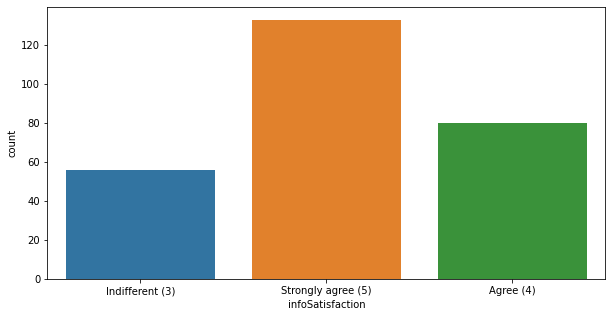

Strongly agree (5)    49.0
Agree (4)             30.0
Indifferent (3)       21.0
Name: infoSatisfaction, dtype: float64 2


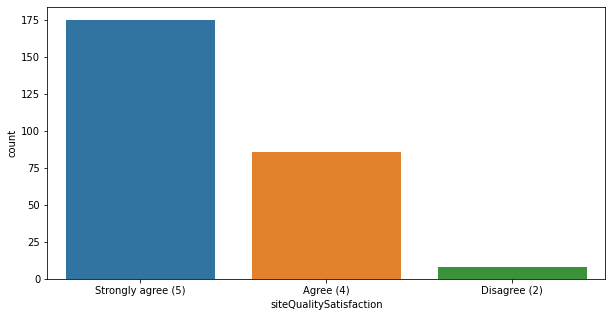

Strongly agree (5)    65.0
Agree (4)             32.0
Disagree (2)           3.0
Name: siteQualitySatisfaction, dtype: float64 2


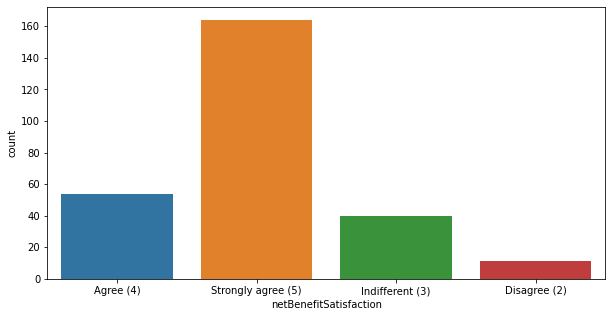

Strongly agree (5)    61.0
Agree (4)             20.0
Indifferent (3)       15.0
Disagree (2)           4.0
Name: netBenefitSatisfaction, dtype: float64 2


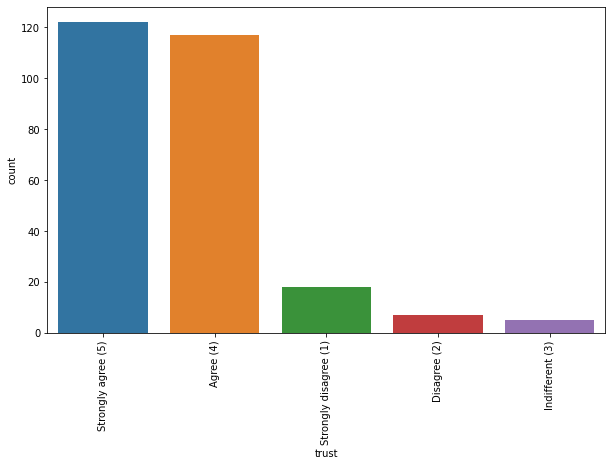

Strongly agree (5)       45.0
Agree (4)                43.0
Strongly disagree (1)     7.0
Disagree (2)              3.0
Indifferent (3)           2.0
Name: trust, dtype: float64 2


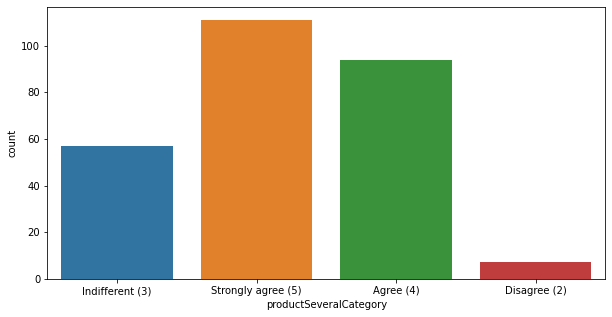

Strongly agree (5)    41.0
Agree (4)             35.0
Indifferent (3)       21.0
Disagree (2)           3.0
Name: productSeveralCategory, dtype: float64 2


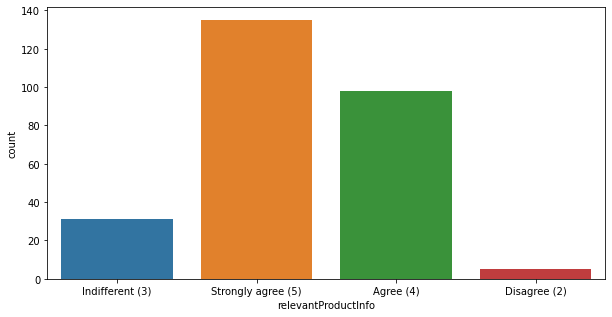

Strongly agree (5)    50.0
Agree (4)             36.0
Indifferent (3)       12.0
Disagree (2)           2.0
Name: relevantProductInfo, dtype: float64 2


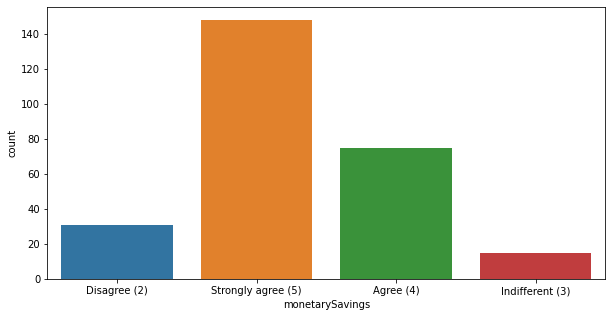

Strongly agree (5)    55.0
Agree (4)             28.0
Disagree (2)          12.0
Indifferent (3)        6.0
Name: monetarySavings, dtype: float64 2


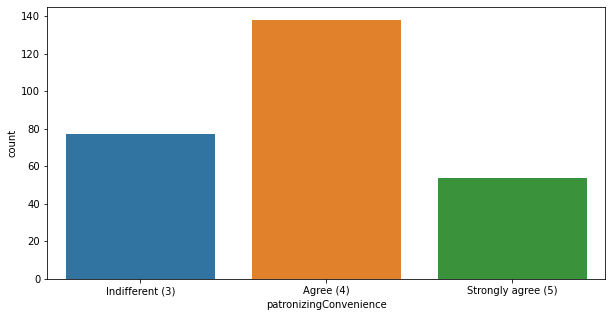

Agree (4)             51.0
Indifferent (3)       29.0
Strongly agree (5)    20.0
Name: patronizingConvenience, dtype: float64 2


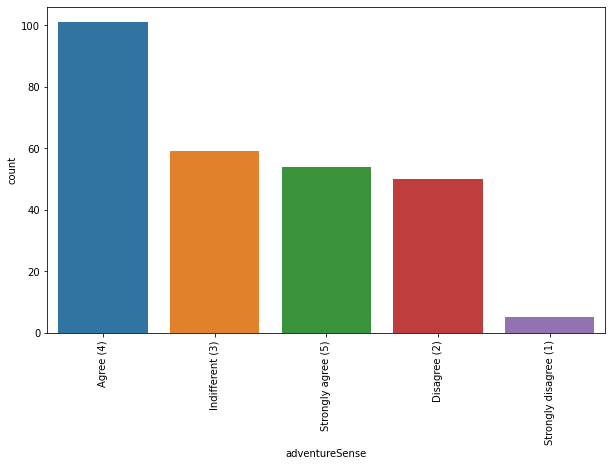

Agree (4)                38.0
Indifferent (3)          22.0
Strongly agree (5)       20.0
Disagree (2)             19.0
Strongly disagree (1)     2.0
Name: adventureSense, dtype: float64 2


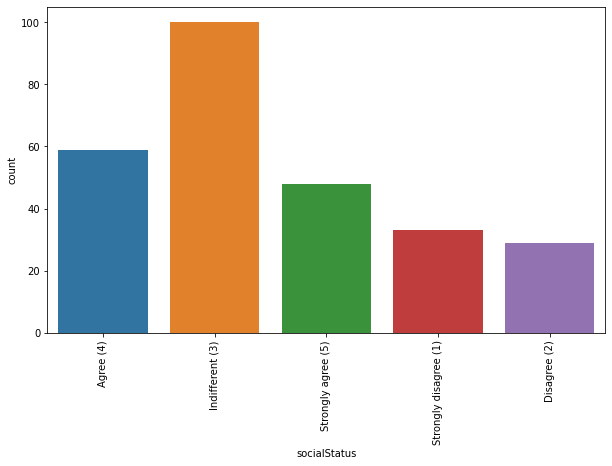

Indifferent (3)          37.0
Agree (4)                22.0
Strongly agree (5)       18.0
Strongly disagree (1)    12.0
Disagree (2)             11.0
Name: socialStatus, dtype: float64 2


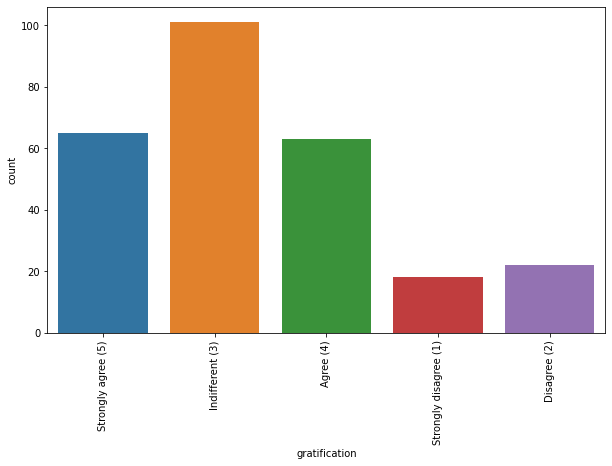

Indifferent (3)          38.0
Strongly agree (5)       24.0
Agree (4)                23.0
Disagree (2)              8.0
Strongly disagree (1)     7.0
Name: gratification, dtype: float64 2


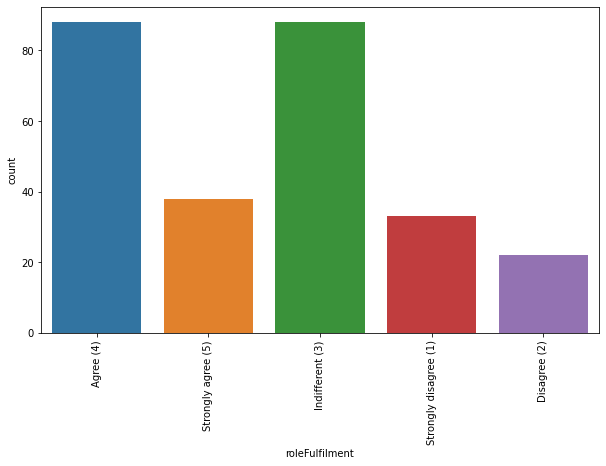

Agree (4)                33.0
Indifferent (3)          33.0
Strongly agree (5)       14.0
Strongly disagree (1)    12.0
Disagree (2)              8.0
Name: roleFulfilment, dtype: float64 2


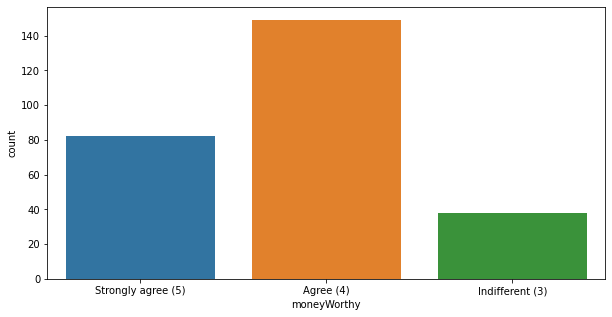

Agree (4)             55.0
Strongly agree (5)    30.0
Indifferent (3)       14.0
Name: moneyWorthy, dtype: float64 2


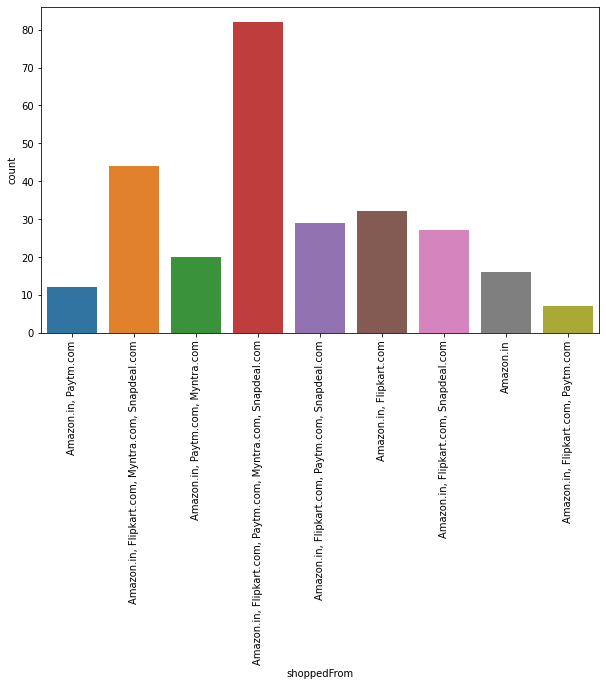

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         12.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11.0
Amazon.in, Flipkart.com, Snapdeal.com                           10.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in                                                        6.0
Amazon.in, Paytm.com                                             4.0
Amazon.in, Flipkart.com, Paytm.com                               3.0
Name: shoppedFrom, dtype: float64 2


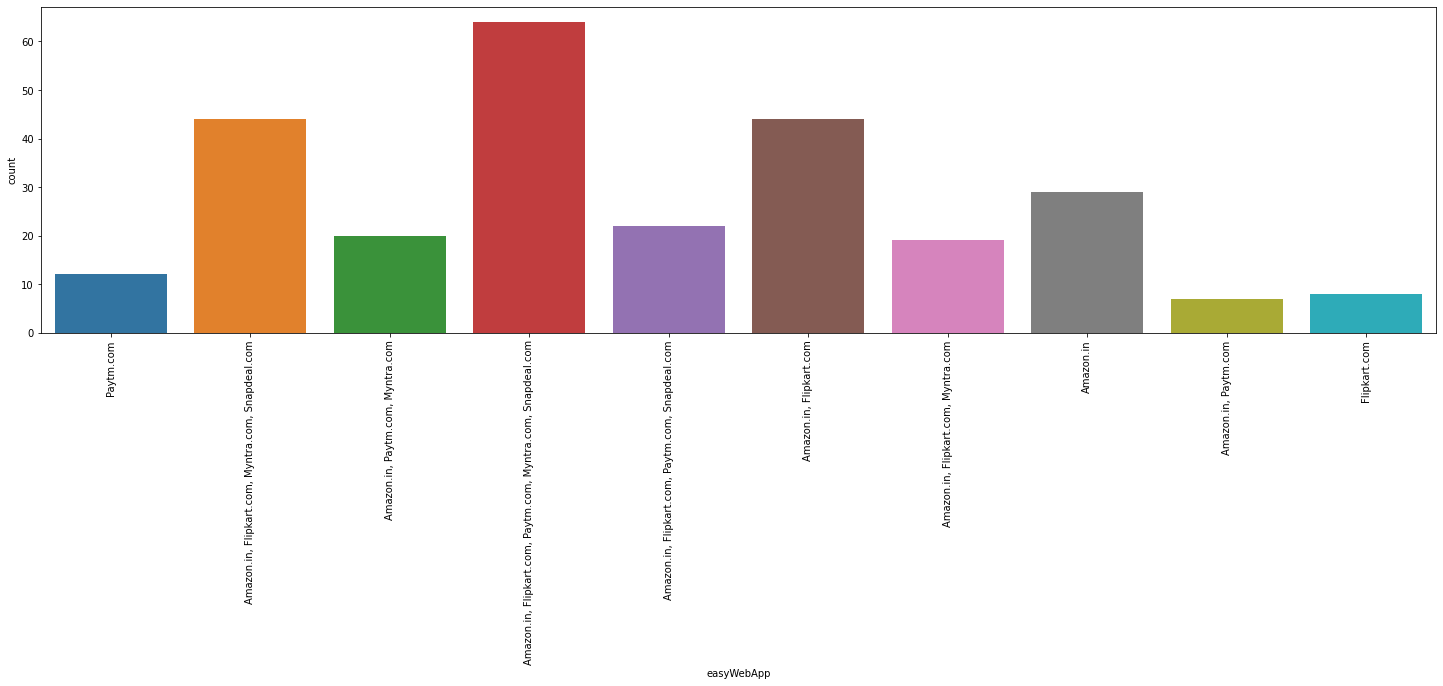

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24.0
Amazon.in, Flipkart.com                                         16.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in                                                       11.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 8.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              7.0
Paytm.com                                                        4.0
Flipkart.com                                                     3.0
Amazon.in, Paytm.com                                             3.0
Name: easyWebApp, dtype: float64 2


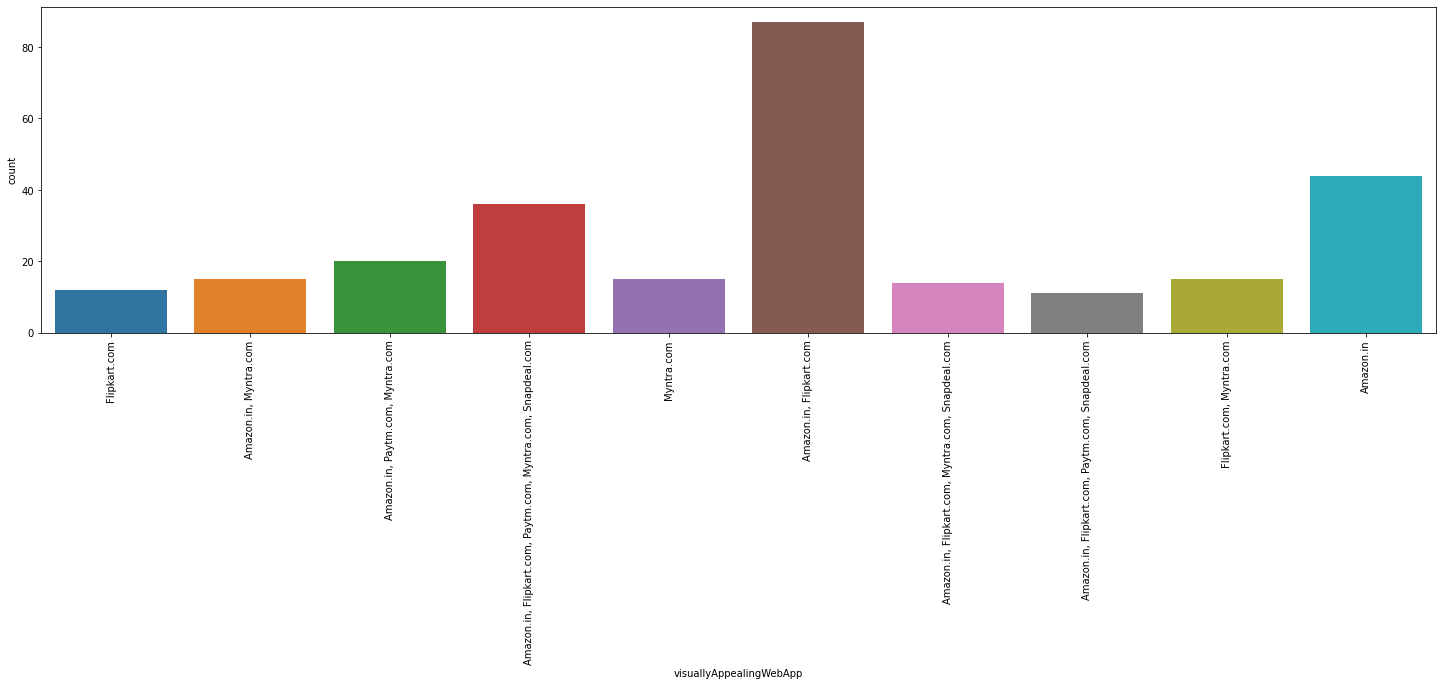

Amazon.in, Flipkart.com                                         32.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Flipkart.com, Myntra.com                                         6.0
Myntra.com                                                       6.0
Amazon.in, Myntra.com                                            6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Flipkart.com                                                     4.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 4.0
Name: visuallyAppealingWebApp, dtype: float64 2


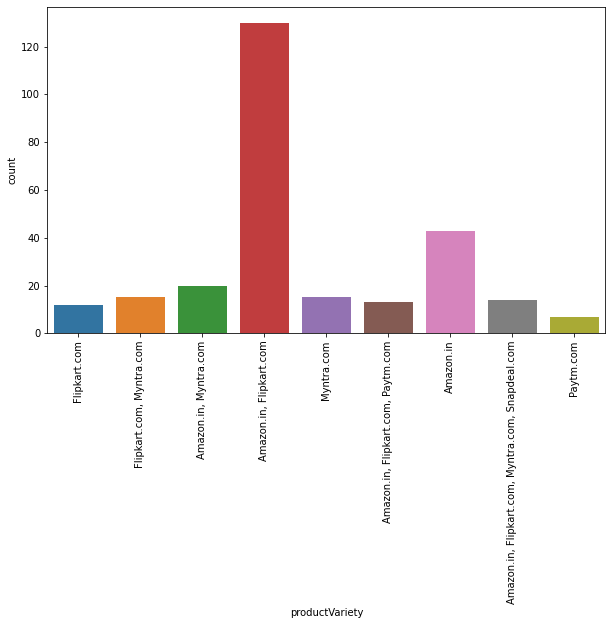

Amazon.in, Flipkart.com                              48.0
Amazon.in                                            16.0
Amazon.in, Myntra.com                                 7.0
Flipkart.com, Myntra.com                              6.0
Myntra.com                                            6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                    5.0
Flipkart.com                                          4.0
Paytm.com                                             3.0
Name: productVariety, dtype: float64 2


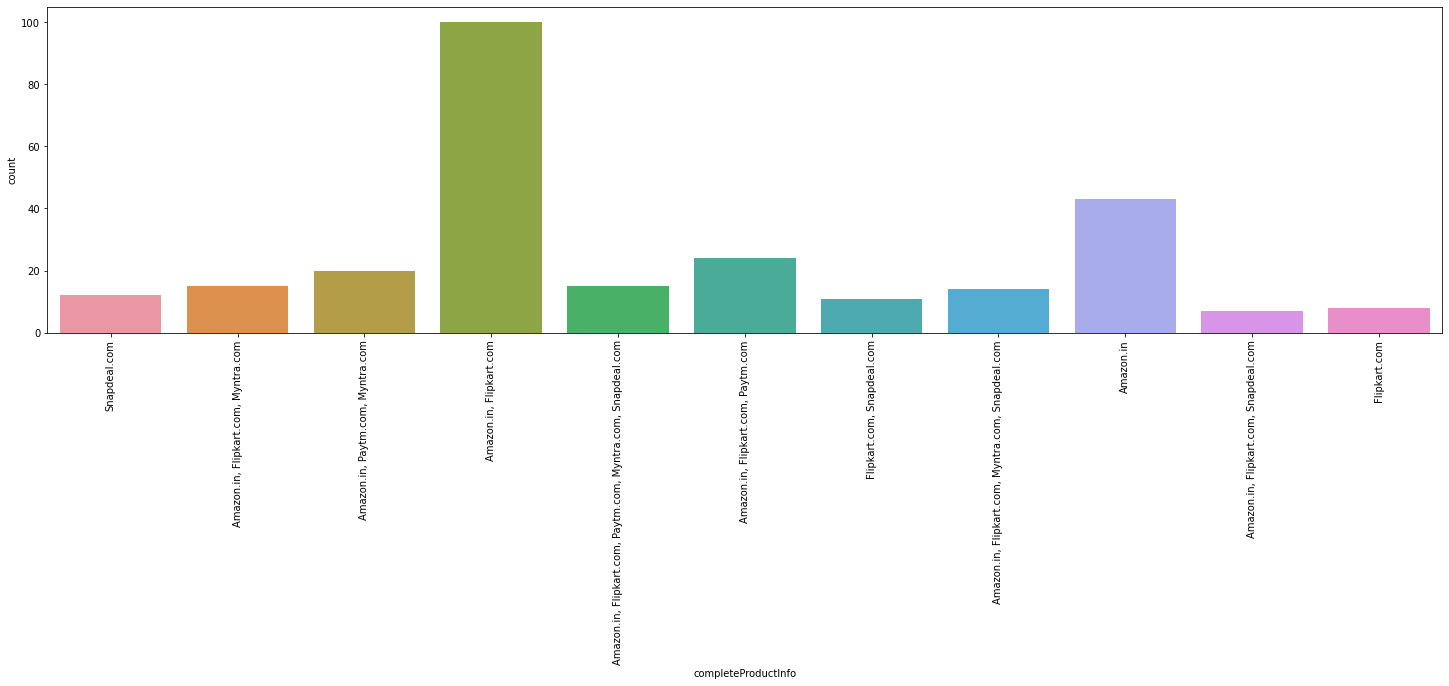

Amazon.in, Flipkart.com                                         37.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com, Snapdeal.com                                       4.0
Flipkart.com                                                     3.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: completeProductInfo, dtype: float64 2


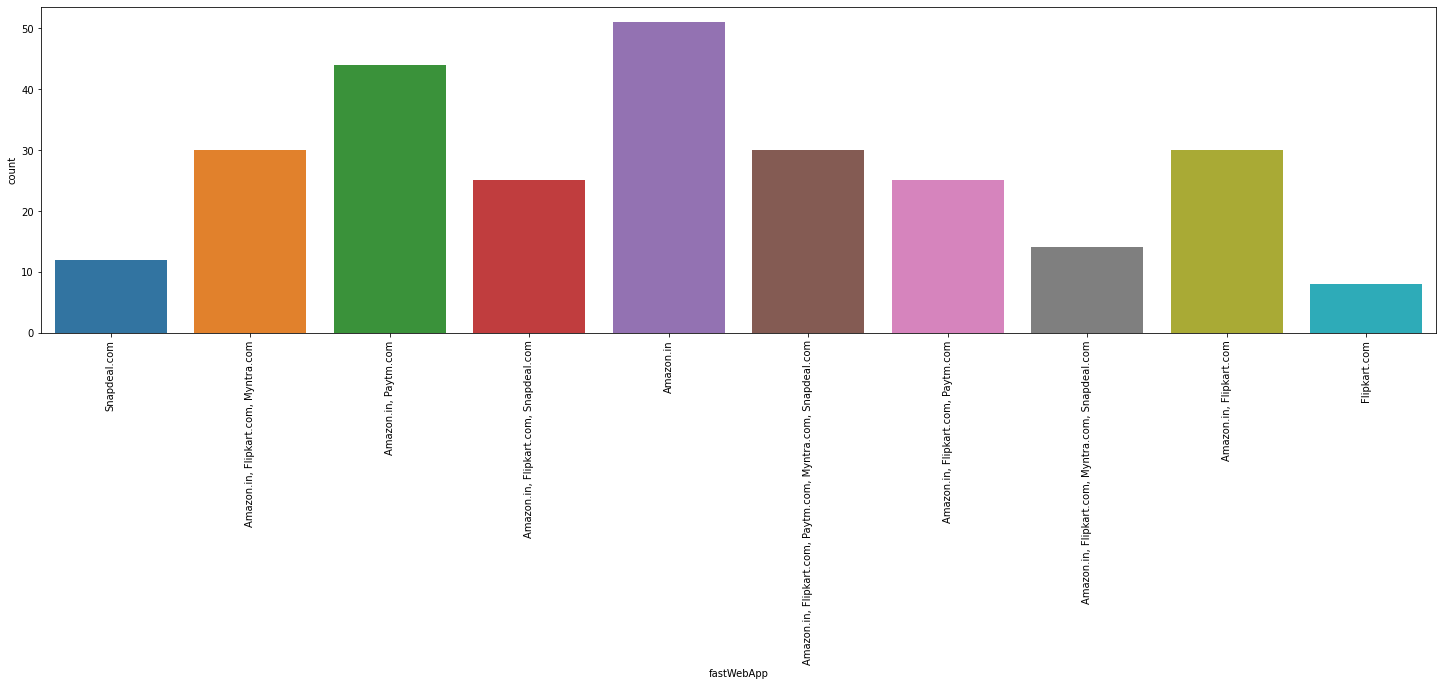

Amazon.in                                                       19.0
Amazon.in, Paytm.com                                            16.0
Amazon.in, Flipkart.com                                         11.0
Amazon.in, Flipkart.com, Myntra.com                             11.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com                                                     3.0
Name: fastWebApp, dtype: float64 2


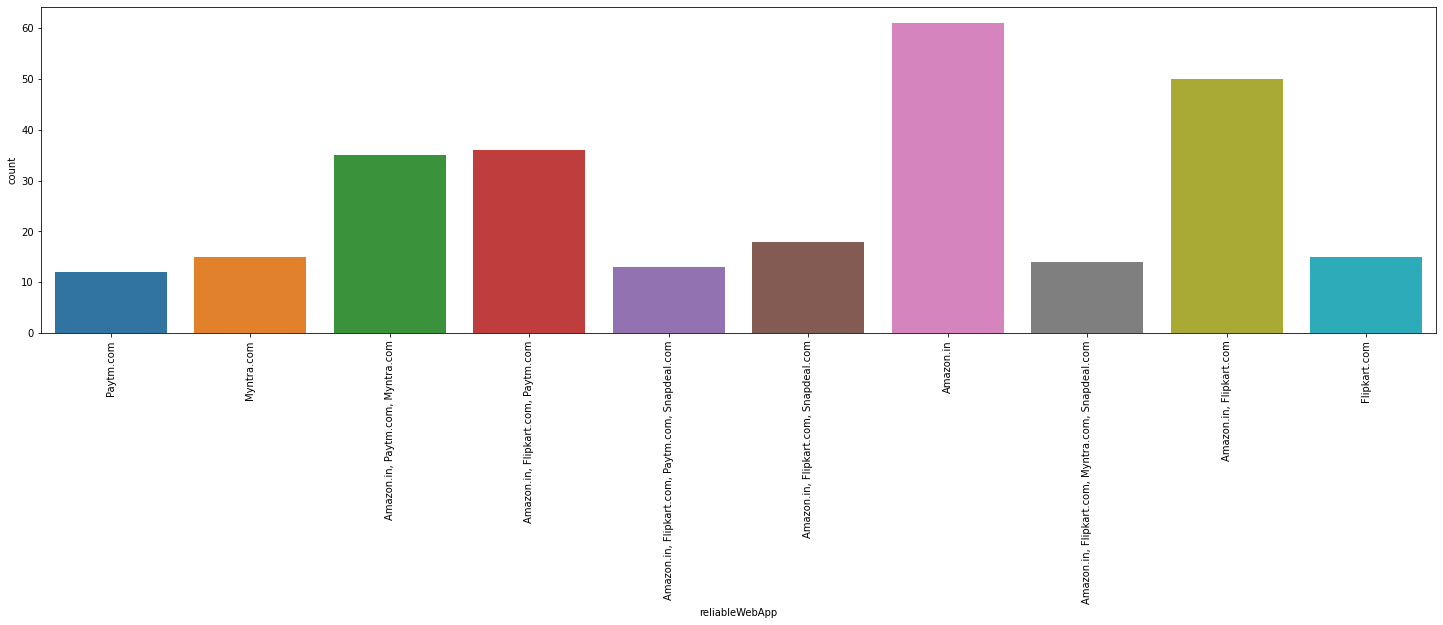

Amazon.in                                            23.0
Amazon.in, Flipkart.com                              19.0
Amazon.in, Flipkart.com, Paytm.com                   13.0
Amazon.in, Paytm.com, Myntra.com                     13.0
Amazon.in, Flipkart.com, Snapdeal.com                 7.0
Flipkart.com                                          6.0
Myntra.com                                            6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com      5.0
Paytm.com                                             4.0
Name: reliableWebApp, dtype: float64 2


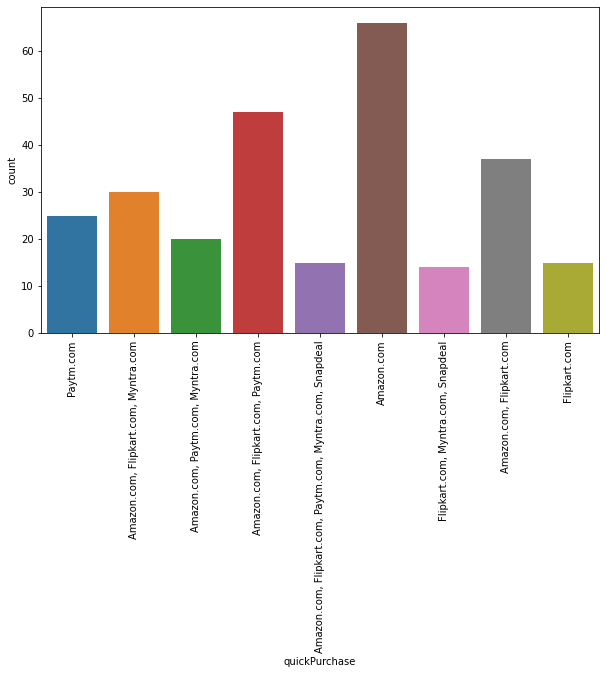

Amazon.com                                                   25.0
Amazon.com, Flipkart.com, Paytm.com                          17.0
Amazon.com, Flipkart.com                                     14.0
Amazon.com, Flipkart.com, Myntra.com                         11.0
Paytm.com                                                     9.0
Amazon.com, Paytm.com, Myntra.com                             7.0
Flipkart.com                                                  6.0
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal     6.0
Flipkart.com, Myntra.com, Snapdeal                            5.0
Name: quickPurchase, dtype: float64 2


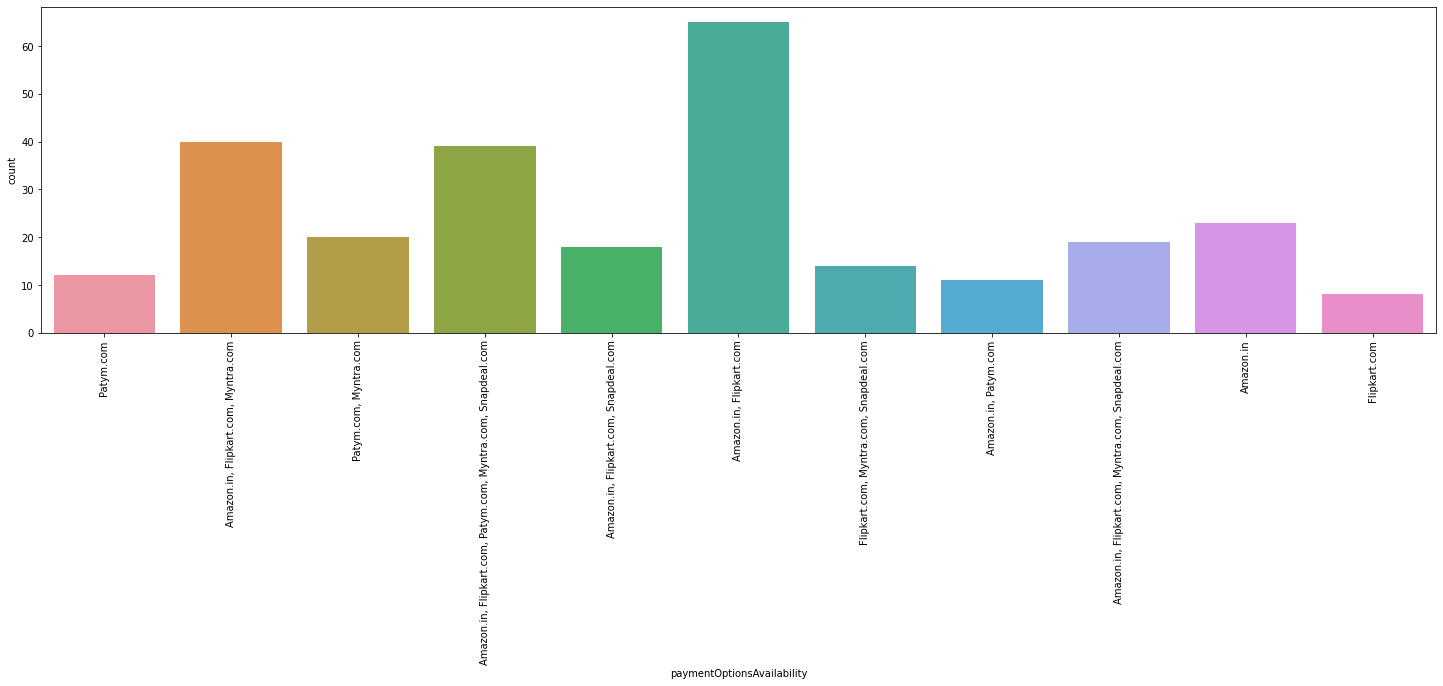

Amazon.in, Flipkart.com                                         24.0
Amazon.in, Flipkart.com, Myntra.com                             15.0
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    14.0
Amazon.in                                                        9.0
Patym.com, Myntra.com                                            7.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                7.0
Amazon.in, Flipkart.com, Snapdeal.com                            7.0
Flipkart.com, Myntra.com, Snapdeal.com                           5.0
Patym.com                                                        4.0
Amazon.in, Patym.com                                             4.0
Flipkart.com                                                     3.0
Name: paymentOptionsAvailability, dtype: float64 2


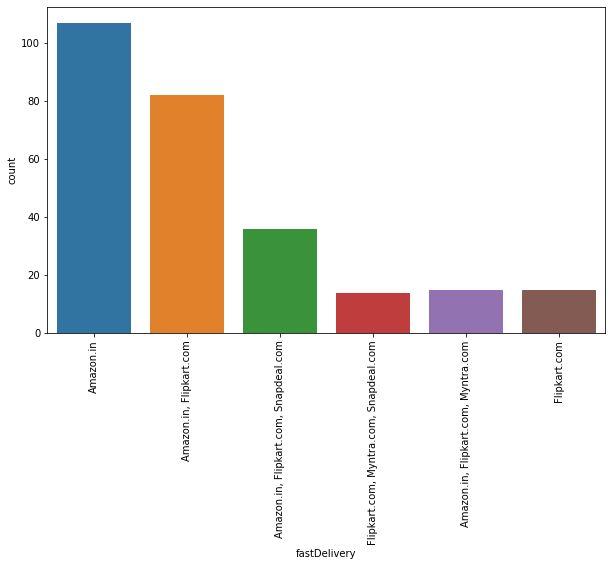

Amazon.in                                 40.0
Amazon.in, Flipkart.com                   30.0
Amazon.in, Flipkart.com, Snapdeal.com     13.0
Amazon.in, Flipkart.com, Myntra.com        6.0
Flipkart.com                               6.0
Flipkart.com, Myntra.com, Snapdeal.com     5.0
Name: fastDelivery, dtype: float64 2


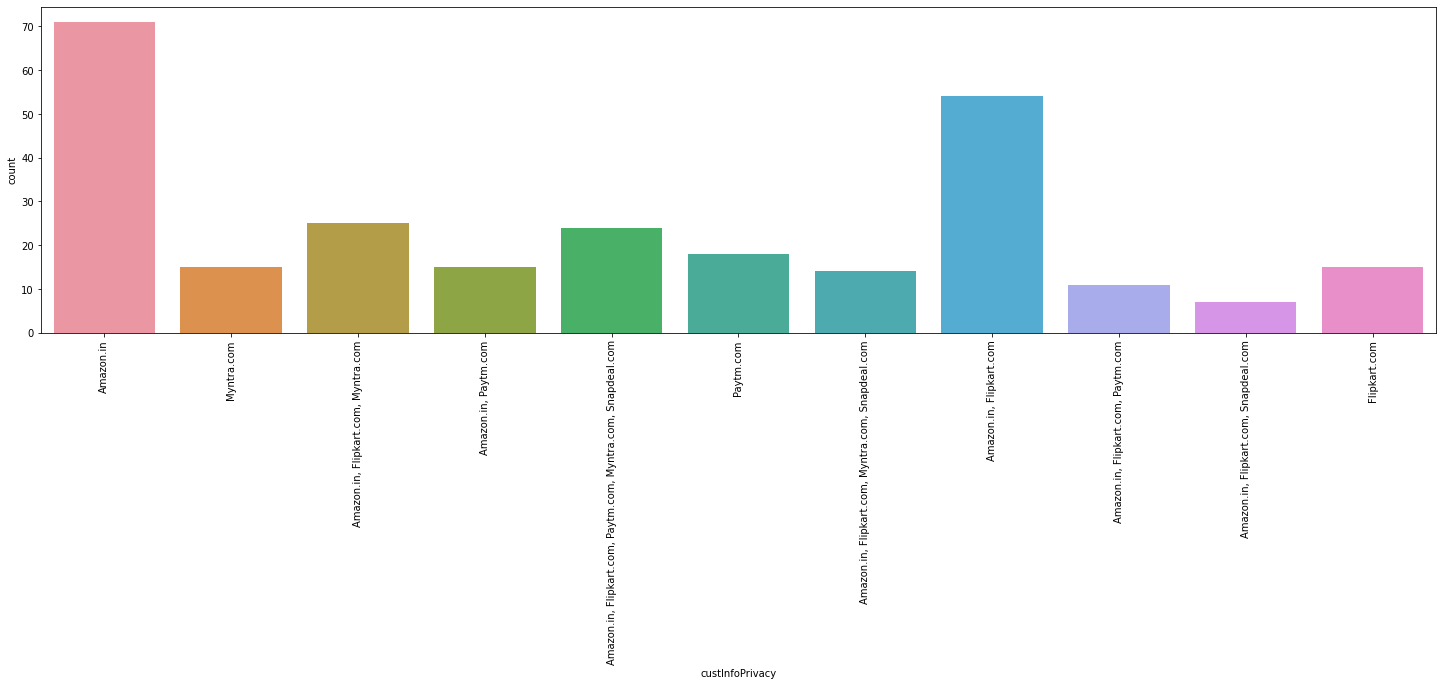

Amazon.in                                                       26.0
Amazon.in, Flipkart.com                                         20.0
Amazon.in, Flipkart.com, Myntra.com                              9.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     9.0
Paytm.com                                                        7.0
Amazon.in, Paytm.com                                             6.0
Flipkart.com                                                     6.0
Myntra.com                                                       6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: custInfoPrivacy, dtype: float64 2


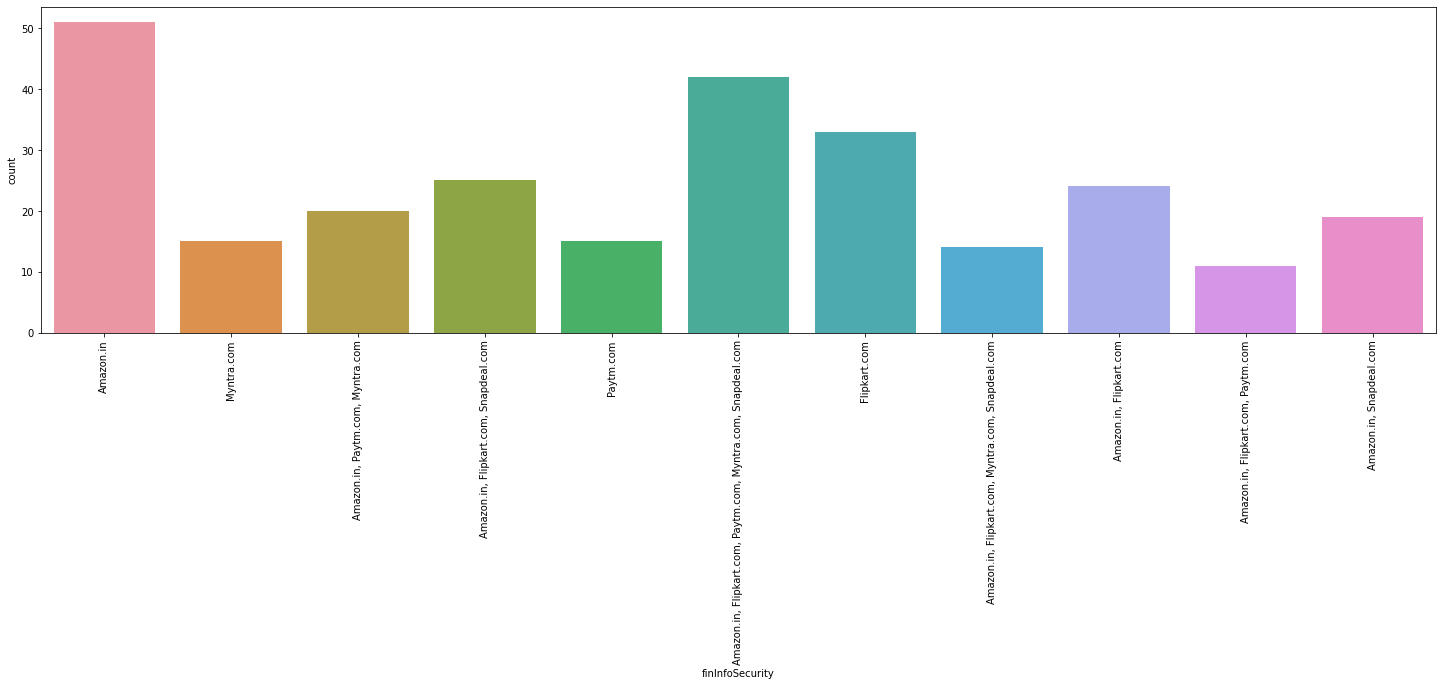

Amazon.in                                                       19.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16.0
Flipkart.com                                                    12.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com                                          9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Snapdeal.com                                          7.0
Paytm.com                                                        6.0
Myntra.com                                                       6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: finInfoSecurity, dtype: float64 2


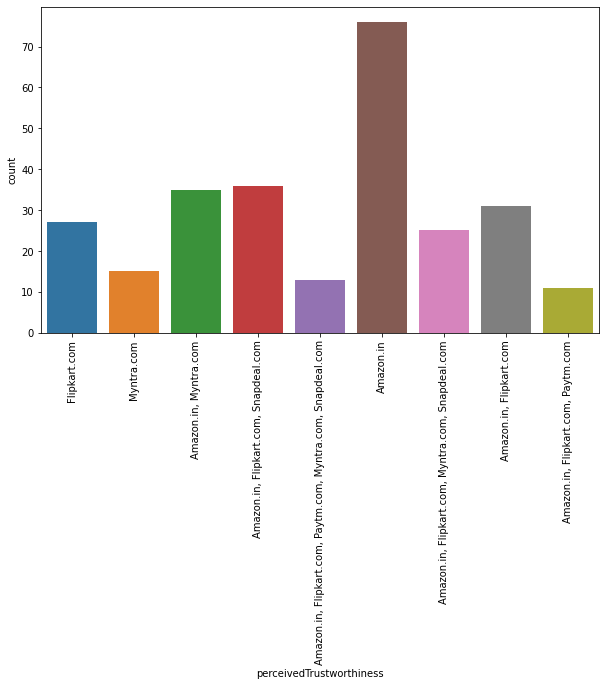

Amazon.in                                                       28.0
Amazon.in, Flipkart.com, Snapdeal.com                           13.0
Amazon.in, Myntra.com                                           13.0
Amazon.in, Flipkart.com                                         12.0
Flipkart.com                                                    10.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                9.0
Myntra.com                                                       6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: perceivedTrustworthiness, dtype: float64 2


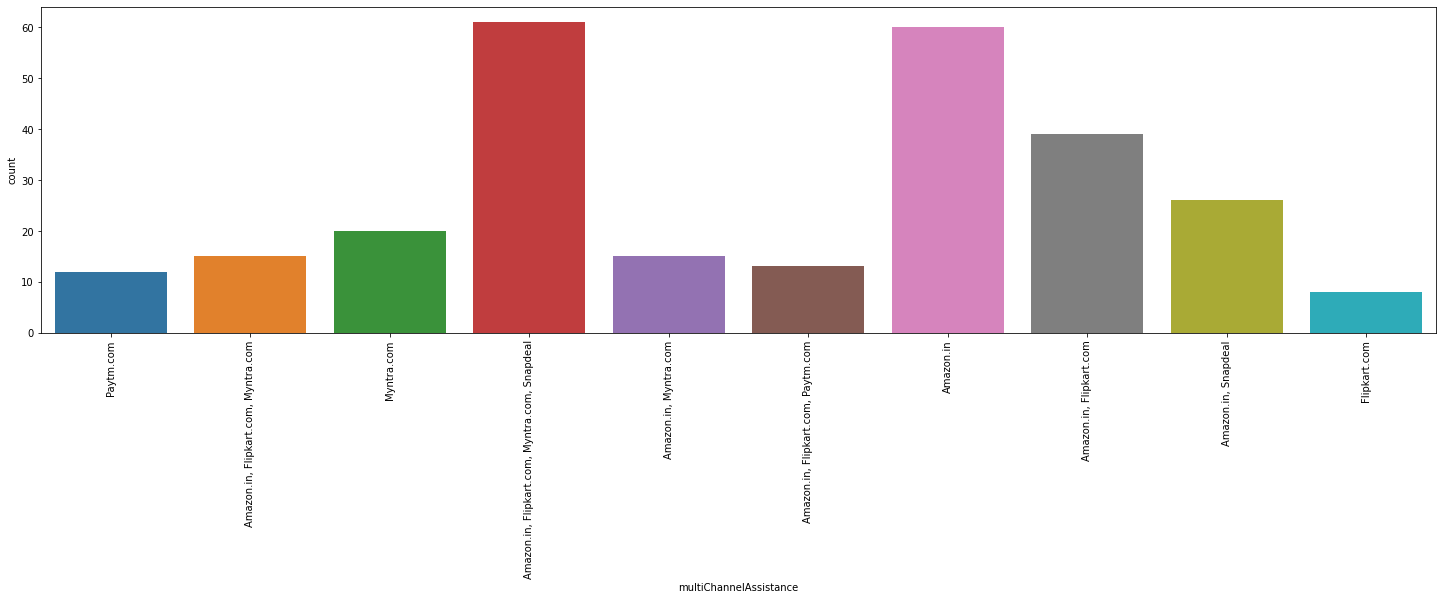

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    23.0
Amazon.in                                        22.0
Amazon.in, Flipkart.com                          14.0
Amazon.in, Snapdeal                              10.0
Myntra.com                                        7.0
Amazon.in, Flipkart.com, Myntra.com               6.0
Amazon.in, Myntra.com                             6.0
Amazon.in, Flipkart.com, Paytm.com                5.0
Paytm.com                                         4.0
Flipkart.com                                      3.0
Name: multiChannelAssistance, dtype: float64 2


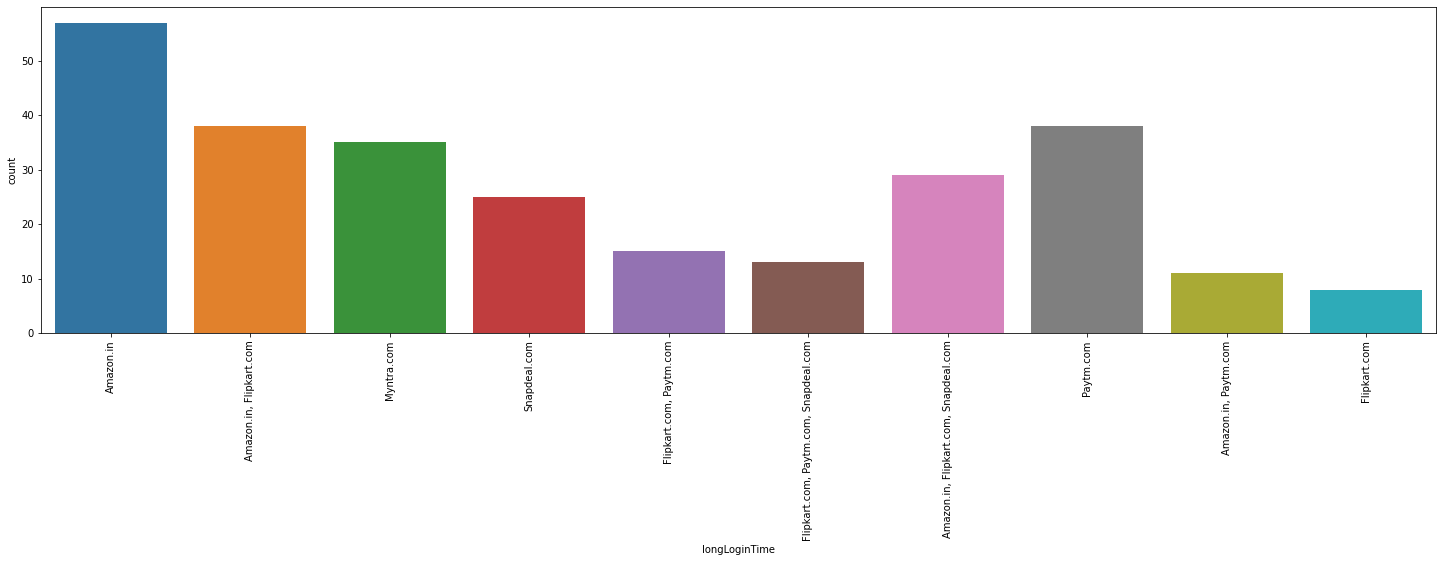

Amazon.in                                21.0
Paytm.com                                14.0
Amazon.in, Flipkart.com                  14.0
Myntra.com                               13.0
Amazon.in, Flipkart.com, Snapdeal.com    11.0
Snapdeal.com                              9.0
Flipkart.com, Paytm.com                   6.0
Flipkart.com, Paytm.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                      4.0
Flipkart.com                              3.0
Name: longLoginTime, dtype: float64 2


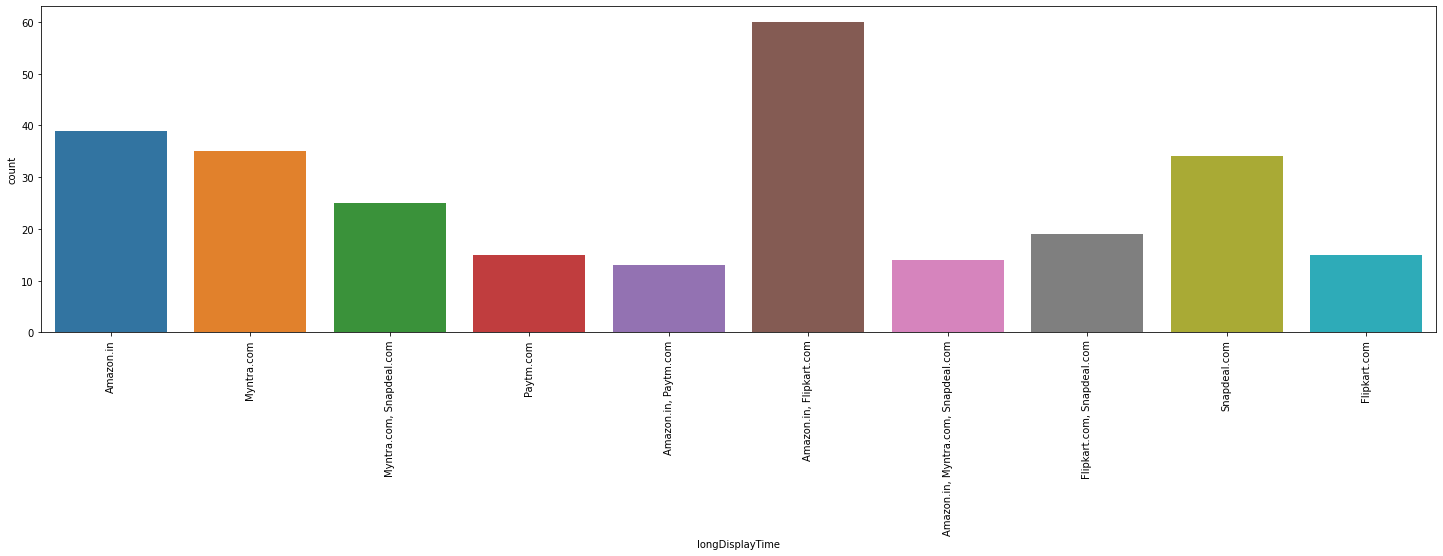

Amazon.in, Flipkart.com                22.0
Amazon.in                              14.0
Myntra.com                             13.0
Snapdeal.com                           13.0
Myntra.com, Snapdeal.com                9.0
Flipkart.com, Snapdeal.com              7.0
Paytm.com                               6.0
Flipkart.com                            6.0
Amazon.in, Myntra.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                    5.0
Name: longDisplayTime, dtype: float64 2


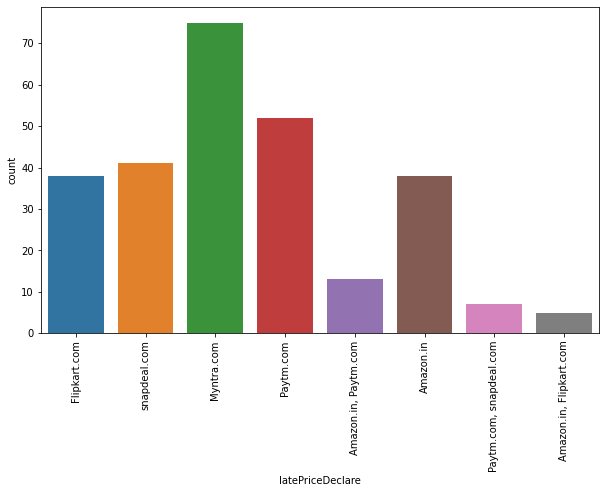

Myntra.com                 28.0
Paytm.com                  19.0
snapdeal.com               15.0
Amazon.in                  14.0
Flipkart.com               14.0
Amazon.in, Paytm.com        5.0
Paytm.com, snapdeal.com     3.0
Amazon.in, Flipkart.com     2.0
Name: latePriceDeclare, dtype: float64 2


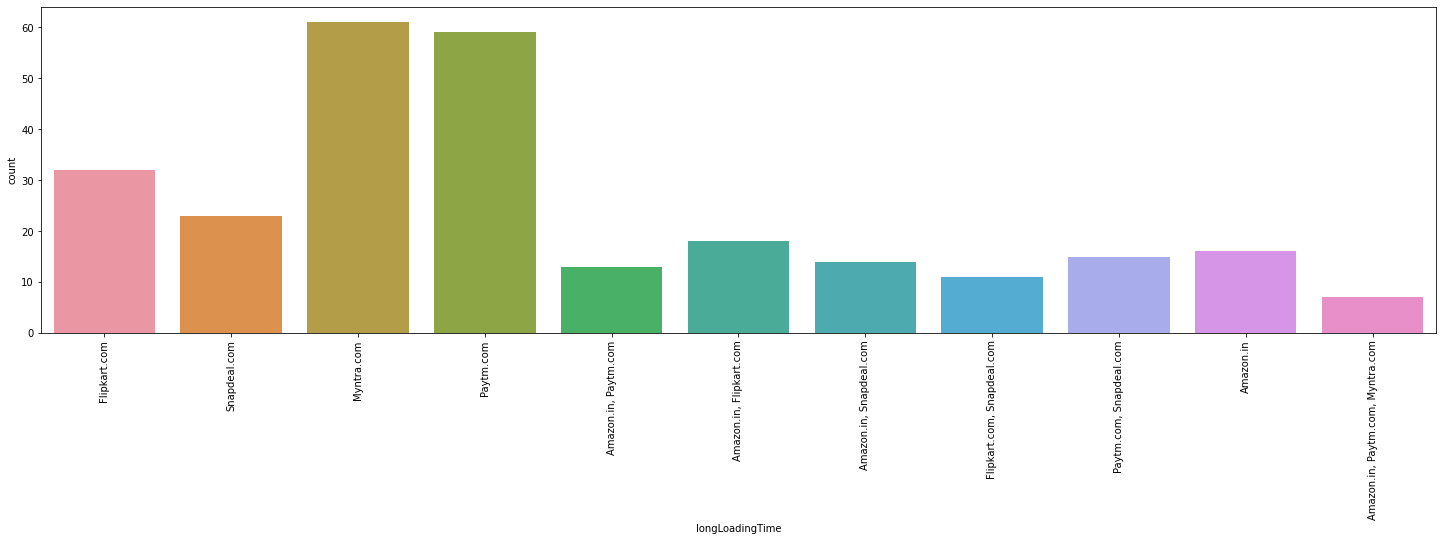

Myntra.com                          23.0
Paytm.com                           22.0
Flipkart.com                        12.0
Snapdeal.com                         9.0
Amazon.in, Flipkart.com              7.0
Amazon.in                            6.0
Paytm.com, Snapdeal.com              6.0
Amazon.in, Snapdeal.com              5.0
Amazon.in, Paytm.com                 5.0
Flipkart.com, Snapdeal.com           4.0
Amazon.in, Paytm.com, Myntra.com     3.0
Name: longLoadingTime, dtype: float64 2


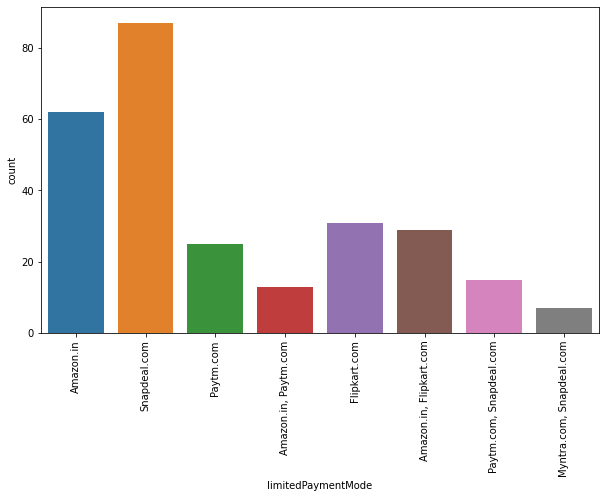

Snapdeal.com                32.0
Amazon.in                   23.0
Flipkart.com                12.0
Amazon.in, Flipkart.com     11.0
Paytm.com                    9.0
Paytm.com, Snapdeal.com      6.0
Amazon.in, Paytm.com         5.0
Myntra.com, Snapdeal.com     3.0
Name: limitedPaymentMode, dtype: float64 2


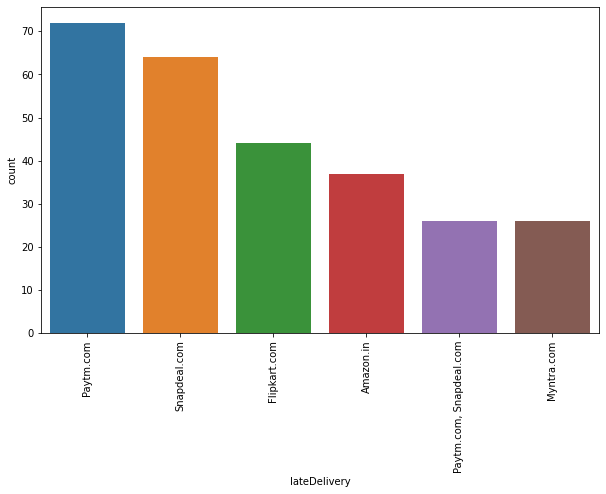

Paytm.com                  27.0
Snapdeal.com               24.0
Flipkart.com               16.0
Amazon.in                  14.0
Paytm.com, Snapdeal.com    10.0
Myntra.com                 10.0
Name: lateDelivery, dtype: float64 2


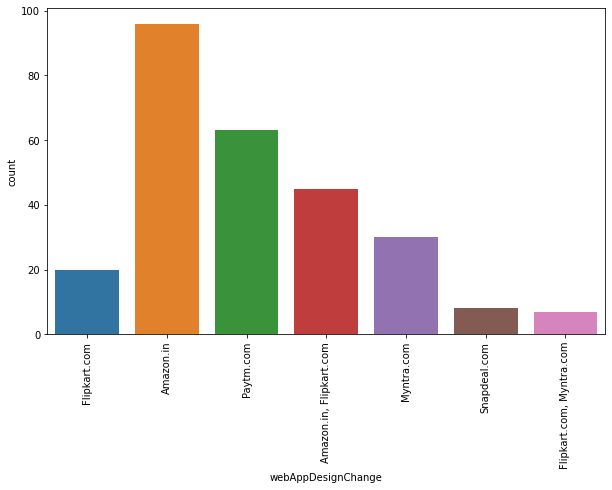

Amazon.in                   36.0
Paytm.com                   23.0
Amazon.in, Flipkart.com     17.0
Myntra.com                  11.0
Flipkart.com                 7.0
Snapdeal.com                 3.0
Flipkart.com, Myntra.com     3.0
Name: webAppDesignChange, dtype: float64 2


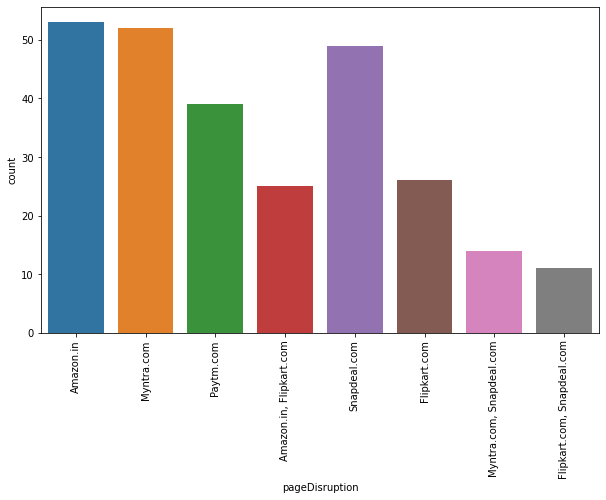

Amazon.in                     20.0
Myntra.com                    19.0
Snapdeal.com                  18.0
Paytm.com                     14.0
Flipkart.com                  10.0
Amazon.in, Flipkart.com        9.0
Myntra.com, Snapdeal.com       5.0
Flipkart.com, Snapdeal.com     4.0
Name: pageDisruption, dtype: float64 2


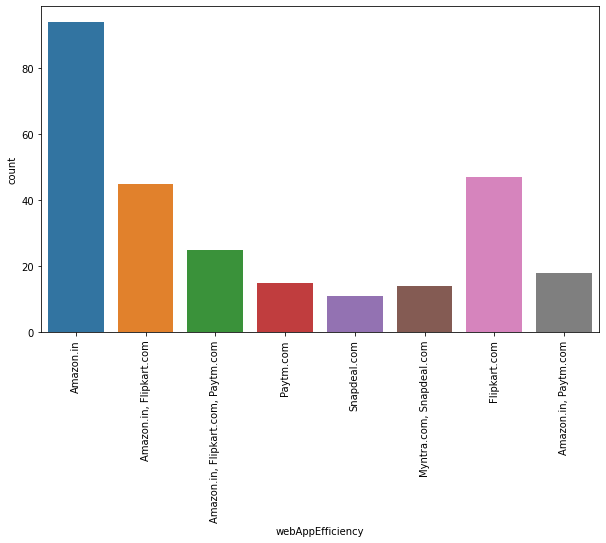

Amazon.in                             35.0
Flipkart.com                          17.0
Amazon.in, Flipkart.com               17.0
Amazon.in, Flipkart.com, Paytm.com     9.0
Amazon.in, Paytm.com                   7.0
Paytm.com                              6.0
Myntra.com, Snapdeal.com               5.0
Snapdeal.com                           4.0
Name: webAppEfficiency, dtype: float64 2


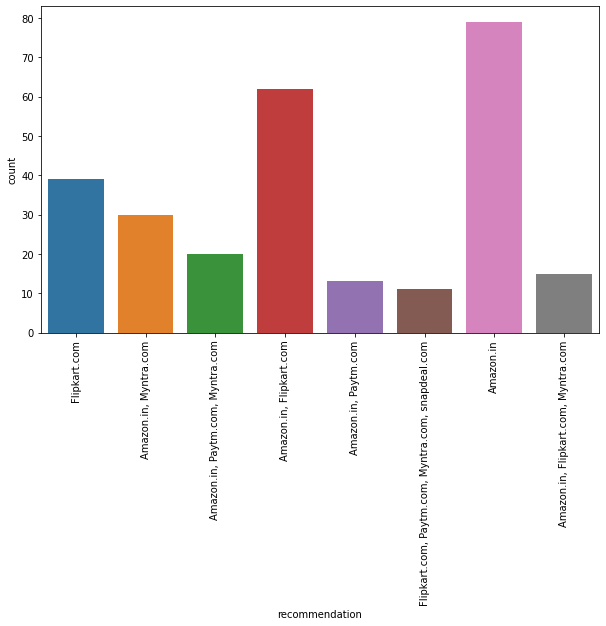

Amazon.in                                            29.0
Amazon.in, Flipkart.com                              23.0
Flipkart.com                                         14.0
Amazon.in, Myntra.com                                11.0
Amazon.in, Paytm.com, Myntra.com                      7.0
Amazon.in, Flipkart.com, Myntra.com                   6.0
Amazon.in, Paytm.com                                  5.0
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     4.0
Name: recommendation, dtype: float64 2


In [38]:
for i in categorical:
    value_count(i)

In [39]:
# graph represents-

# when we check the gender graph Female customers (67%)approx. are more than male customers.

# 75 % of customers are between 20 to 50 who shopped online.

# Citywise Delhi, Greater noida , Bangalore, Noida are the cities with high number of buyers

# IN last one year 42% customers have purchased online,23% customers purchased 31-40 times only
# 2 percent customers purchased more than 42 times
# 36% customers were found shopping online for more than 4 years while 24% were shopping for 2-3 years

# A high percentage of people approx 70% customers used mobile internet for online purchasein which  52% customers used Smartphone and 32% used laptop least 4% used tablet

# 45% customers use Windows phone.

# 80% customers used Google chrome for online purchase.

# Approx 86% customers uses Search engine to reach their favorite online store.

# when we check about time taking then we find out that 46% customers take at least 15 minutes before making a purchase while 26% take 6-10 minutes only

# In this era a high number 55% customers prefer Credit/Debit cards to make payments ,28% preferred COD and 17 % preferred Wallets

# regarding cancellation 64% customers abandon their shopping cart sometimes while 19% abandon their cart frequently in which 49% customers abandon their bag due to better alternative offer, 20% abandon due to promo code not applicable

# more than 50% customers have strongly agreed to have easy website content which is easy to understand

# less than 50% customers agree that Information on similar product to the one highlighted is important for product comparison.

# 70% customers agree that Complete information on listed seller and product being offered is important for purchase decision

# most of the people like almost 90% customers agree all relevant information on listed products must be stated clearly.

# 90% customers agreed that the website should be easily navigable

# More than 50 percent find that the online stores should invest heavily in creating user friendly apps and websites, so that the customers do not have to work around much and the overall shopping experience is smooth.

# 59% customers strongly agree with the convenient paying methods. The reluctance to make online payments is gradually reducing. The acceptance has been built by addressing the trust issue over time by giving customers an option to pay online or to pay Cash On Delivery (COD)

# Being able to guarantee the privacy of the customer: This also got 69% strongly agree. Costumers are concerned about the unauthorized access to their data. Protecting user privacy will enable stores to drive more revenue and gain more customers

# Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.): 90% customers agreed to it. In case one channel is not available, customers can reach out to multiple channels which again is an important factor. Being able to communicate easily can make the difference in both their shopping experience as well as fulfill business goals of online store.

# 50% agree that online shopping gives monetary benefit and discounts to the customer: Most online shopping sites offer amazing round-the-year discounts. Banks and Digital Wallets have happily jumped on the online shopping bandwagon by providing Reward Points, and instant Cashback offers in addition to brand discounts, which will help to gain new customers

# now in Pandemic days around 84% customers agree that online shopping is convenient and flexible and 60 % in them enjoy doing online shopping.

# almost all i.e 90% customers agree that return and replacement policy helps them making purchase decision. It is evident from the fact that people cannot actually try & touch the products, they are purchasing before it reaches home and they would want to return or replace in case of dissatisfaction. Online shopping websites should make strategies around easy return and replacement policy if they want to retain their customers.

# Customer feel that one should display quality information on the websites that increases customer satisfaction and repurchase intentions

# Net Benefit derived from shopping online can lead to users satisfaction:90% customers agreed

# Offering a wide variety of listed product in several categories: 75% use agreed.

# More than 80% customers agree to receive monetary savings while shopping online

# almost half i.e 50% customers agree that online shopping give the sense of adventure

# 45% customers feel that shopping online helps them fulfill certain roles and gratified with their fav retailer

# Maximum people have shopped from Flipkart , Amazon, Paytm Myntra and Snapdeal.com in which 48% customers says flipkart, amazon shows wide variety of products

# Amazon is highly liked in terms of speed and trust.

# 80% customers likes Amazon's quickness to complete the purchase , 60% likes Flipart's, 30% likes Myntra's

# 70% trust amazon in terms of keeping their financial information secured, 56% Flipakrt, 34% Myntra , 21% Snapdeal , 22%Paytm

# 86% customers like Amazon in terms of online assistance through multi-channel , 51% -Flipkart ,42% Myntra

# In terms of late declaration of price in promotion/sales 28% goes with Myntra, 21% amazon , 16% flipkart , 18% Snapdeal, 23% Paytm

# 61% customers says that amazon website is as efficient as before, 43% for flipkart, 22% for Paytm, 9% for Snapdeal



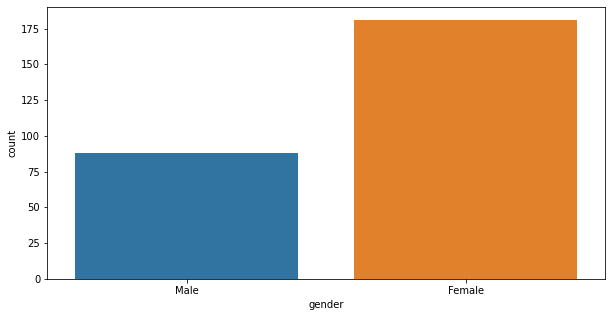

Female    67.0
Male      33.0
Name: gender, dtype: float64 2


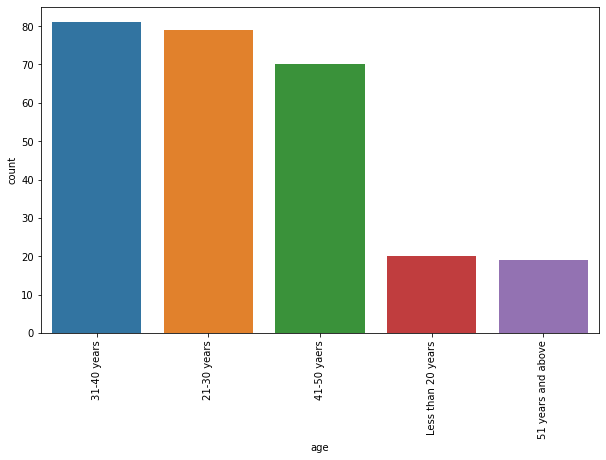

31-40 years           30.0
21-30 years           29.0
41-50 yaers           26.0
Less than 20 years     7.0
51 years and above     7.0
Name: age, dtype: float64 2


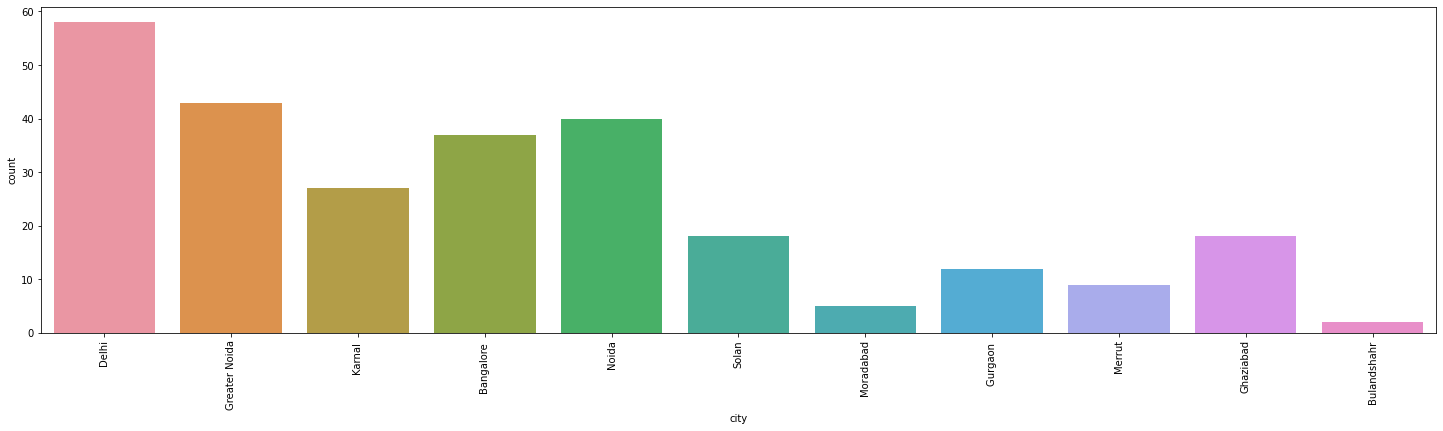

Delhi            22.0
Greater Noida    16.0
Noida            15.0
Bangalore        14.0
Karnal           10.0
Ghaziabad         7.0
Solan             7.0
Gurgaon           4.0
Merrut            3.0
Moradabad         2.0
Bulandshahr       1.0
Name: city, dtype: float64 2


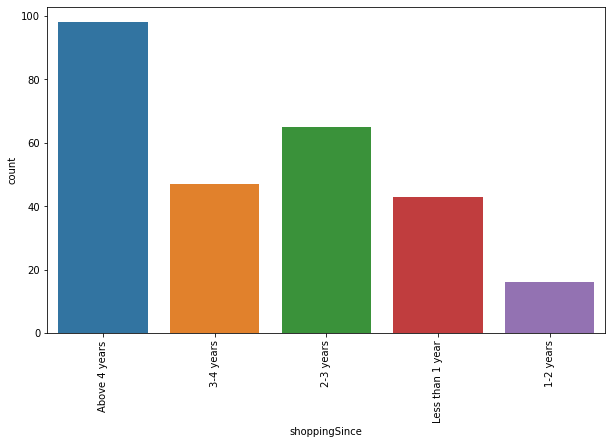

Above 4 years       36.0
2-3 years           24.0
3-4 years           17.0
Less than 1 year    16.0
1-2 years            6.0
Name: shoppingSince, dtype: float64 2


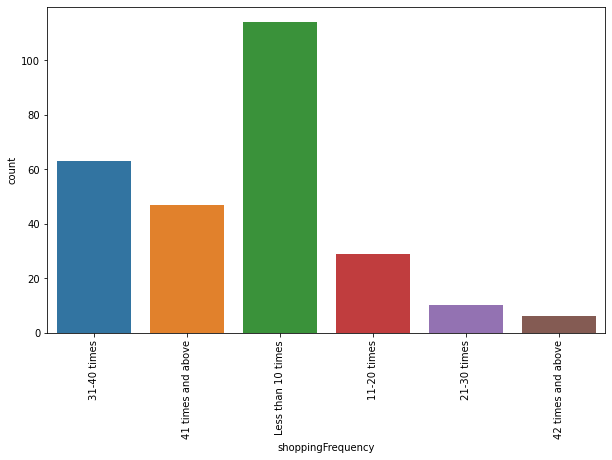

Less than 10 times    42.0
31-40 times           23.0
41 times and above    17.0
11-20 times           11.0
21-30 times            4.0
42 times and above     2.0
Name: shoppingFrequency, dtype: float64 2


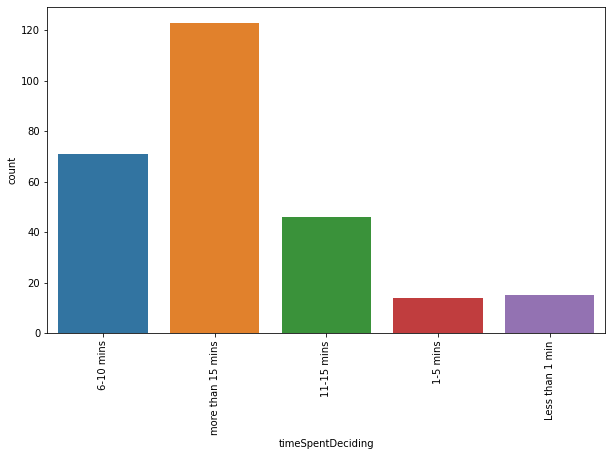

more than 15 mins    46.0
6-10 mins            26.0
11-15 mins           17.0
Less than 1 min       6.0
1-5 mins              5.0
Name: timeSpentDeciding, dtype: float64 2


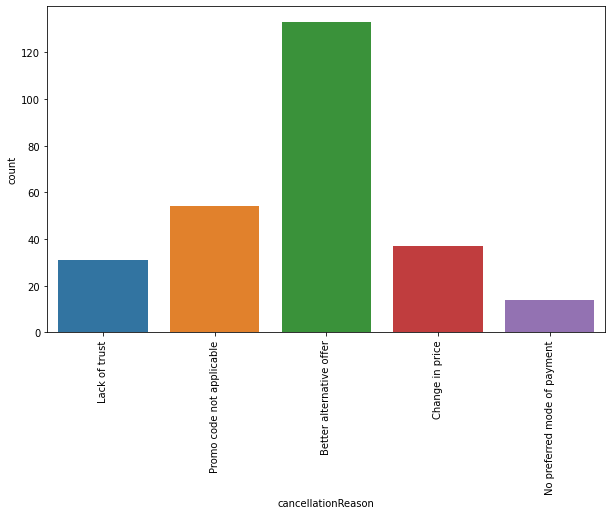

Better alternative offer        49.0
Promo code not applicable       20.0
Change in price                 14.0
Lack of trust                   12.0
No preferred mode of payment     5.0
Name: cancellationReason, dtype: float64 2


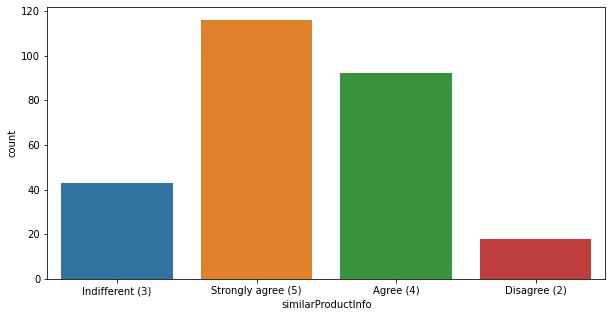

Strongly agree (5)    43.0
Agree (4)             34.0
Indifferent (3)       16.0
Disagree (2)           7.0
Name: similarProductInfo, dtype: float64 2


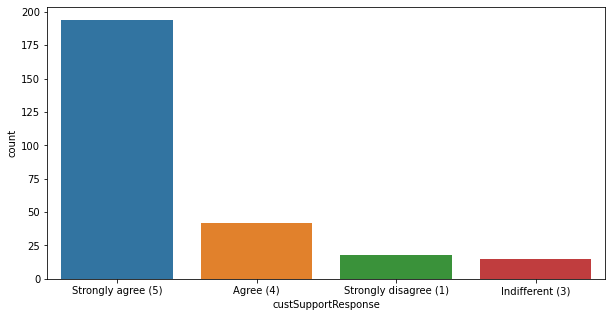

Strongly agree (5)       72.0
Agree (4)                16.0
Strongly disagree (1)     7.0
Indifferent (3)           6.0
Name: custSupportResponse, dtype: float64 2


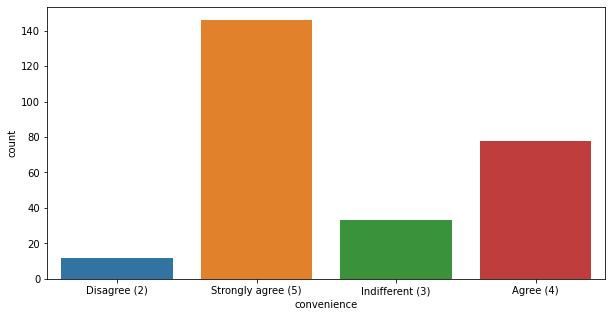

Strongly agree (5)    54.0
Agree (4)             29.0
Indifferent (3)       12.0
Disagree (2)           4.0
Name: convenience, dtype: float64 2


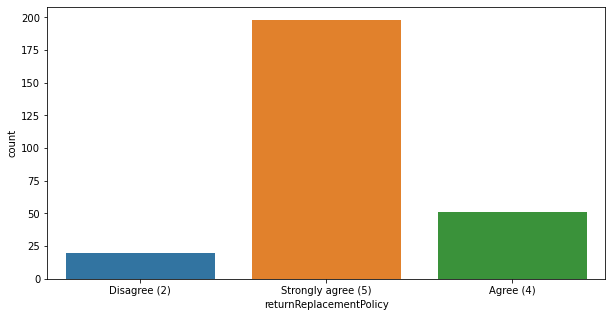

Strongly agree (5)    74.0
Agree (4)             19.0
Disagree (2)           7.0
Name: returnReplacementPolicy, dtype: float64 2


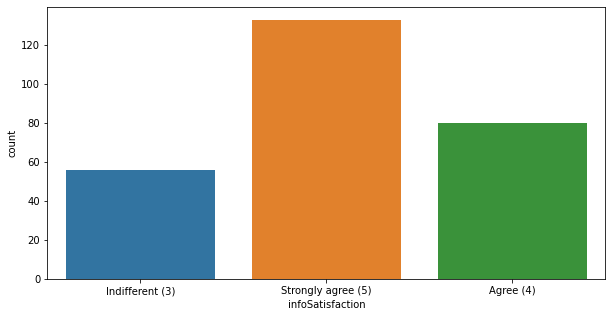

Strongly agree (5)    49.0
Agree (4)             30.0
Indifferent (3)       21.0
Name: infoSatisfaction, dtype: float64 2


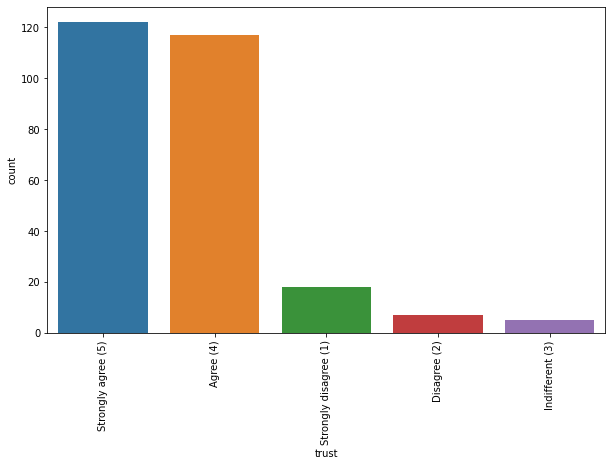

Strongly agree (5)       45.0
Agree (4)                43.0
Strongly disagree (1)     7.0
Disagree (2)              3.0
Indifferent (3)           2.0
Name: trust, dtype: float64 2


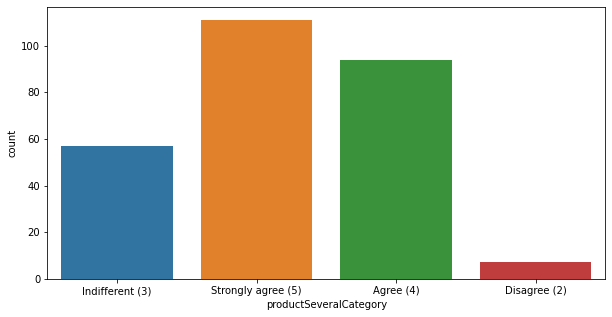

Strongly agree (5)    41.0
Agree (4)             35.0
Indifferent (3)       21.0
Disagree (2)           3.0
Name: productSeveralCategory, dtype: float64 2


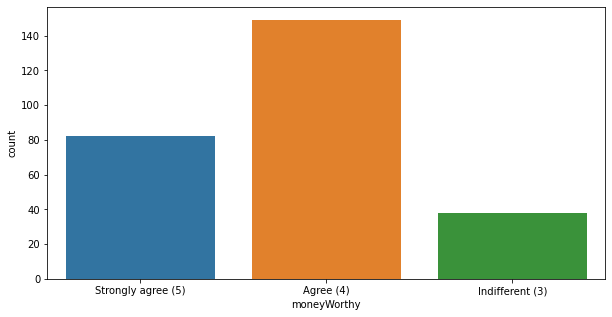

Agree (4)             55.0
Strongly agree (5)    30.0
Indifferent (3)       14.0
Name: moneyWorthy, dtype: float64 2


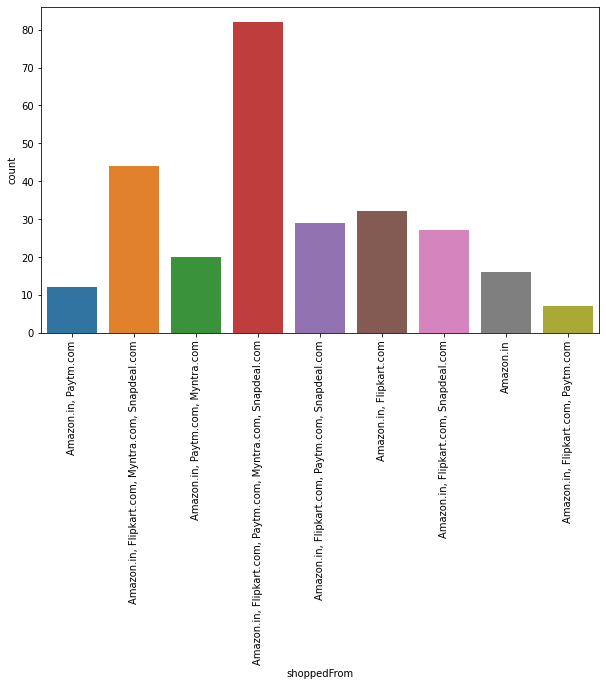

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         12.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11.0
Amazon.in, Flipkart.com, Snapdeal.com                           10.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in                                                        6.0
Amazon.in, Paytm.com                                             4.0
Amazon.in, Flipkart.com, Paytm.com                               3.0
Name: shoppedFrom, dtype: float64 2


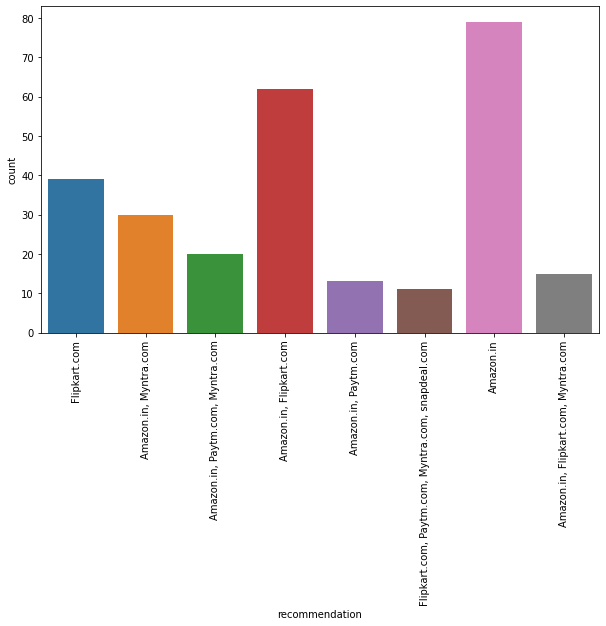

Amazon.in                                            29.0
Amazon.in, Flipkart.com                              23.0
Flipkart.com                                         14.0
Amazon.in, Myntra.com                                11.0
Amazon.in, Paytm.com, Myntra.com                      7.0
Amazon.in, Flipkart.com, Myntra.com                   6.0
Amazon.in, Paytm.com                                  5.0
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     4.0
Name: recommendation, dtype: float64 2


In [40]:
data2=data.iloc[:,[0,1,2,4,5,13,16,18,26,31,32,34,37,38,46,47,70]]
for i in data2:
    value_count(i)

In [41]:
# now the graph represents that females are dominant shpper and take less time in shopping
# Bulandshr and moradabad has no females although.

In [42]:
# purchase factors: 

purchase_factors = data[['contentReadability', 'productInfoClarity','relevantProductInfo', 'navigationEase',
                            'loadingProcessingSpeed','userFrienlyInterface','sellerProductInfo','similarProductInfo']]

x_data=[]

label = ['Strongly agree (5)', 'Agree (4)', 'Indifferent (3)', 'Disagree (2)','Strongly disagree (1)']
for each in purchase_factors.columns:
    data = pd.DataFrame(purchase_factors[each].value_counts()).reset_index()
    data.columns = ['factor','count']
    #data = data.sort_values(by='factor')
    
    category = [l for l in data['factor']]
    missing_label = list(set(label).difference(category))
    
    for miss in missing_label:
        i = len(data)+1
        data.loc[i,:] = miss, 0
        
    data = data.sort_values(by='factor')
    data['percentages'] = round((data['count']/data['count'].sum())*100,2)
    x = [p for p in data['percentages']]
    x_data.append(x)
        
top_labels = ['Agree<br>(4)', 'Disagree<br>(2)','Indifferent<br>(3)','Strongly<br>agree<br>(5)','Strongly<br>disagree<br>(1)']

y_data = ['Content on the website must be easy to read and understand.',
         'All relevant information on listed<br>products must be stated clearly',
         'Provision of complete<br>and relevant product information',
         'Ease of navigation in website',
         'Loading and processing speed',
         'Complete information on listed seller and<br>product being offered is important',
         'Information on similar product to the<br>one highlighted is important for comparison']

colors = ['#004D40','#00796B','#009688','#4DB6AC','#B2DFDB']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))
        

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=150, r=5, t=150, b=80),
    showlegend=False,
    title='Purchase decisions on online Retail Store are based on following factors : '
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=12,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=11,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=11,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()



Text(0.5, 1.0, 'Correlation between variables: ')

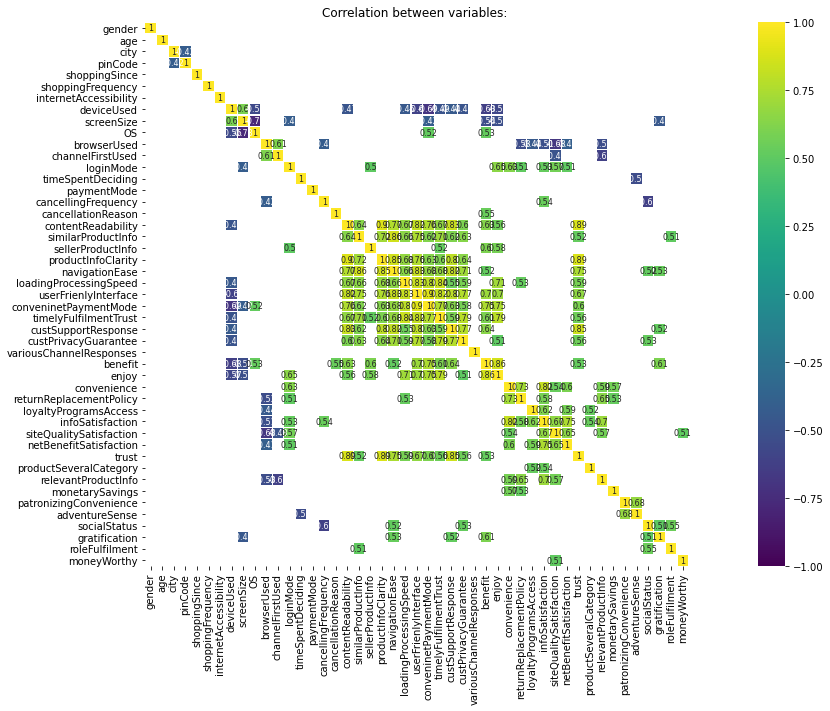

In [43]:
# Let's find the columns which has more correlation - for people to purchase online and the app that they use : 

data = encoded_data.iloc[:,:47]
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])

corr =data.corr()
plt.figure(figsize=(25, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title("Correlation between variables: ")

In [44]:
#### Observation:

# From the graph it is proved that , data related to how the person is accessing the app or website does not matter as it has negative correlation.
# Customer retention can be done, majorly with customer reviews and by finding out if they are satisfied with the quality of product.

In [45]:
# finding the most shopping age group

age_count = pd.DataFrame(data['age'].value_counts()).reset_index()
age_count.columns = ['ageGroup','count']


fig = px.bar(age_count, x='ageGroup',y='count',
             color='count',
             title = 'Online Shopping Trend in different Age Groups: ')
fig.show()

In [46]:
# now the graph represents that 20-50 age grouppeople prefer online shopping main reason behind that they probably have less time to go out and shop.

In [47]:
# checking the genders males or females? who is shopping more

gender_ratio= data[['age','gender']]
gender_ratio['gender'] = pd.DataFrame(encoded_data['gender']).astype('int64')
gender_ratio = gender_ratio[:269]

unique_age_group = list(gender_ratio.groupby('age'))

rows = 2
columns = 3
subplot_titles = [age[0] for age in unique_age_group]
specs = [[{'type':'domain'}] * columns] * rows
#specs = [[{'type':'domain'}] * cols] * rows

fig = make_subplots(
        rows = rows,
        cols = columns,
        subplot_titles = subplot_titles,
        specs = specs,
        print_grid = False)

#i=group number
#l=data in each group
for i,l in enumerate(unique_age_group):
    row = i // columns + 1
    col = i % (rows + 1) + 1
    age = l[0]
    data = pd.DataFrame(l[1])
    
    df = data.groupby('gender').size().reset_index()
    df.columns=['gender','count']
    val = pd.Series(df['count']).array
    
    colors = ['blue','pink']
    fig.add_trace(go.Pie(
                    labels = ['Male','Female'],
                    values=val,
                    showlegend = True,
                    textposition='inside'
                    ),
                 row=row,
                 col=col
           )
    fig.update_traces(hoverinfo='label+percent', marker=dict(colors=colors)) 
    fig.update_layout(title='Who shops the most?', title_x=0.5)
fig.show()
    
    

In [48]:
# now it is clearly proven in any age group more than 50% females shop online as compared to males.